In [775]:
install.packages("ggplot2")
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Cargar los datos en un dataframe llamado: airbnb

In [776]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [777]:
airbnb[1:6,]

Zipcode Neighbourhood.Cleansed Property.Type Room.Type       Accommodates
1 28004   Universidad            Apartment     Private room    2           
2 28004   Universidad            Apartment     Entire home/apt 6           
3 28004   Universidad            Apartment     Entire home/apt 3           
4 28004   Universidad            Loft          Entire home/apt 3           
5 28015   Universidad            Apartment     Entire home/apt 5           
6 28004   Universidad            Apartment     Entire home/apt 2           
  Bathrooms Bedrooms Beds Bed.Type
1 2         1        1    Real Bed
2 1         3        5    Real Bed
3 1         2        2    Real Bed
4 2         1        1    Real Bed
5 1         1        1    Real Bed
6 1         0        1    Real Bed
  Amenities                                                                                                                                                                                                                                                                                                                                                       
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  Square.Feet Price Review.Scores.Rating
1  NA         35     NA                 
2  NA         92     96                 
3  NA         55     91                 
4  NA         60    100                 
5 538         75     90                 
6  NA         55     95

Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [778]:
str(airbnb)

'data.frame':	13207 obs. of  13 variables:
 $ Zipcode               : Factor w/ 77 levels "","-","20013",..: 15 15 15 15 26 15 15 15 26 15 ...
 $ Neighbourhood.Cleansed: Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...
 $ Property.Type         : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 1 16 1 1 15 1 1 1 ...
 $ Room.Type             : Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ Accommodates          : int  2 6 3 3 5 2 7 3 2 4 ...
 $ Bathrooms             : num  2 1 1 2 1 1 5 1 1 2 ...
 $ Bedrooms              : int  1 3 2 1 1 0 1 1 1 2 ...
 $ Beds                  : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ Bed.Type              : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Amenities             : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 9441 4017 3246 4036 8366 2044 961 7433 5615 7733 ...
 $ Square.Feet           : int  NA NA NA NA 538 NA NA NA 

In [779]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
newnames

[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

In [780]:
names(airbnb)[1:13] <- newnames[1:13]
head(airbnb)

CodigoPostal Barrio      TipoPropiedad TipoAlquiler    MaxOcupantes NumBanyos
1 28004        Universidad Apartment     Private room    2            2        
2 28004        Universidad Apartment     Entire home/apt 6            1        
3 28004        Universidad Apartment     Entire home/apt 3            1        
4 28004        Universidad Loft          Entire home/apt 3            2        
5 28015        Universidad Apartment     Entire home/apt 5            1        
6 28004        Universidad Apartment     Entire home/apt 2            1        
  NumDormitorios NumCamas TipoCama
1 1              1        Real Bed
2 3              5        Real Bed
3 2              2        Real Bed
4 1              1        Real Bed
5 1              1        Real Bed
6 0              1        Real Bed
  Comodidades                                                                                                                                                                                                                                                                                                                                                     
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  PiesCuadrados Precio Puntuacion
1  NA           35      NA       
2  NA           92      96       
3  NA           55      91       
4  NA           60     100       
5 538           75      90       
6  NA           55      95

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [781]:
airbnb$MetrosCuadrados <- round(airbnb$PiesCuadrados*0.092903,2)
airbnb$MetrosCuadrados

[1]     NA     NA     NA     NA  49.98     NA     NA     NA  65.03     NA
   [11]   3.72     NA     NA     NA  60.02     NA     NA     NA     NA     NA
   [21]     NA     NA     NA     NA  69.96     NA     NA     NA     NA     NA
   [31]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [41]     NA     NA     NA     NA     NA  24.99   0.00     NA     NA     NA
   [51]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [61]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [71]     NA     NA     NA     NA   0.00     NA     NA     NA     NA     NA
   [81]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [91]     NA     NA  38.00     NA     NA     NA     NA     NA   0.00     NA
  [101]     NA     NA     NA     NA     NA     NA     NA     NA   2.32     NA
  [111]     NA     NA     NA     NA     NA     NA   0.00     NA     NA     NA
  [121]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [131]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [141]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [151]     NA     NA     NA     NA     NA     NA     NA     NA     NA  90.02
  [161]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [171]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [181]     NA     NA     NA     NA  26.01     NA     NA     NA     NA     NA
  [191]     NA     NA     NA     NA     NA     NA     NA     NA     NA  30.01
  [201]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [211]     NA     NA     NA     NA     NA     NA     NA  65.03     NA     NA
  [221]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [231]     NA     NA     NA   0.00     NA     NA     NA     NA   0.00     NA
  [241]     NA     NA     NA     NA   0.00     NA     NA     NA     NA     NA
  [251]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [261]     NA     NA     NA  49.98     NA     NA     NA     NA     NA     NA
  [271]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [281]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [291]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [301]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [311]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [321]     NA   0.00     NA     NA     NA     NA     NA     NA     NA     NA
  [331]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [341]     NA   0.00     NA     NA     NA     NA     NA     NA     NA     NA
  [351]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [361]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [371]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [381]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [391]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [401]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [411]     NA     NA     NA     NA     NA     NA     NA     NA   1.49     NA
  [421]     NA     NA     NA     NA   0.00     NA     NA     NA     NA     NA
  [431]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [441]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [451]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [461]     NA     NA  99.96     NA     NA     NA     NA     NA     NA     NA
  [471]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [481]  60.02     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [491]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [501]     NA     NA     NA     NA     NA     NA     NA     NA     NA   0.00
  [511]     NA   0.00     

In [782]:
#airbnb$MetrosCuadrados[airbnb$MetrosCuadrados=="NA"] <- "NULL"
#airbnb$MetrosCuadrados[is.na(airbnb$MetrosCuadrados)]<- ""
airbnb

CodigoPostal Barrio           TipoPropiedad TipoAlquiler    MaxOcupantes
1     28004        Universidad      Apartment     Private room     2          
2     28004        Universidad      Apartment     Entire home/apt  6          
3     28004        Universidad      Apartment     Entire home/apt  3          
4     28004        Universidad      Loft          Entire home/apt  3          
5     28015        Universidad      Apartment     Entire home/apt  5          
6     28004        Universidad      Apartment     Entire home/apt  2          
7     28004        Universidad      House         Private room     7          
8     28004        Universidad      Apartment     Entire home/apt  3          
9     28015        Universidad      Apartment     Entire home/apt  2          
10    28004        Universidad      Apartment     Entire home/apt  4          
11    28004        Universidad      Apartment     Entire home/apt  4          
12    28004        Universidad      Apartment     Private room     2          
13    28013        Sol              Apartment     Private room     1          
14    28005        Sol              Apartment     Private room     2          
15    28013        Sol              Apartment     Entire home/apt  4          
16    28013        Sol              Condominium   Entire home/apt  6          
17    28013        Sol              Apartment     Entire home/apt  4          
18    28012        Sol              Apartment     Entire home/apt  6          
19    28013        Sol              Apartment     Entire home/apt  4          
20    28013        Sol              Apartment     Private room     2          
21    28013        Sol              Apartment     Entire home/apt  4          
22    28005        Sol              Apartment     Entire home/apt 10          
23    28013        Sol              Apartment     Entire home/apt  6          
24    28012        Sol              Apartment     Entire home/apt  4          
25    28012        Sol              Apartment     Entire home/apt  4          
26    28013        Sol              Apartment     Entire home/apt  4          
27    28014        Sol              Condominium   Entire home/apt  8          
28    28013        Sol              Apartment     Entire home/apt  6          
29    28012        Sol              Apartment     Private room     1          
30    28005        Sol              Apartment     Entire home/apt  8          
...   ...          ...              ...           ...             ...         
13178 28023        Valdemarín       House         Private room     1          
13179 28023        Aravaca          Condominium   Entire home/apt  3          
13180 28011        Puerta del Angel Apartment     Private room     2          
13181 28011        Puerta del Angel Other         Private room     2          
13182 28011        Puerta del Angel Apartment     Private room     3          
13183 28004        Universidad      Other         Entire home/apt  3          
13184 28004        Universidad      Apartment     Entire home/apt  3          
13185 28004        Universidad      Apartment     Entire home/apt  2          
13186 28015        Universidad      Apartment     Entire home/apt  4          
13187 28015        Universidad      Apartment     Entire home/apt  2          
13188 28015        Universidad      Apartment     Entire home/apt  5          
13189 28015        Universidad      Apartment     Private room     1          
13190 28015        Universidad      Apartment     Entire home/apt  4          
13191 28013        Universidad      Apartment     Entire home/apt  2          
13192 28004        Universidad      Apartment     Entire home/apt  4          
13193 28004        Universidad      Apartment     Entire home/apt 14          
13194 28004        Universidad      Apartment     Private room     1          
13195 28004        Universidad      Apartment     Entire home/apt  3          
13196 28004        Universidad      Apartment     Privat

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [783]:
str(airbnb$CodigoPostal)

 Factor w/ 77 levels "","-","20013",..: 15 15 15 15 26 15 15 15 26 15 ...


In [11]:
airbnb$CodigoPostal<-factor(airbnb$CodigoPostal)
airbnb$CodigoPostal[airbnb$CodigoPostal==""]<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="-"]<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="28"]<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="20013"]<-NA #No es de Madrid
airbnb$CodigoPostal[airbnb$CodigoPostal=="20126"]<-NA #No es de Madrid
airbnb$CodigoPostal[airbnb$CodigoPostal=="25008"]<-NA #No es de Madrid
airbnb$CodigoPostal[airbnb$CodigoPostal=="27004"]<-NA #No es de Madrid
airbnb$CodigoPostal[airbnb$CodigoPostal=="27013"]<-NA #No es de Madrid
airbnb$CodigoPostal[airbnb$CodigoPostal=="2015"]<-"28015"
airbnb$CodigoPostal[airbnb$CodigoPostal=="280013"]<-"28013"
airbnb$CodigoPostal[airbnb$CodigoPostal=="28002 28002"]<-"28002"
airbnb$CodigoPostal[airbnb$CodigoPostal=="28051 28051"]<-"28051"
airbnb$CodigoPostal[airbnb$CodigoPostal=="2815"]<-"28015"
airbnb$CodigoPostal[airbnb$CodigoPostal=="2804"]<-"28004"
airbnb$CodigoPostal[airbnb$CodigoPostal=="2805"]<-"28005"
summary(airbnb$CodigoPostal)

-        20013        20126         2015        25008 
           0            0            0            0            0            0 
       27004        27013           28        28001       280013        28002 
           0            0            0          231            0          170 
28002\n28002        28003        28004        28005        28006        28007 
           1          185         1795         1195          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1020 
       28014        28015        28016        28017        28018        28019 
         630          602           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029        28030        28031 
          93          122          263          110           73           27 
       28032        28033        28034        28035        28036        28037 
          33           89           45           59           67           65 
       28038        28039         2804        28040        28041        28042 
          77          160            0           16           63           90 
       28043        28044        28045        28046        28047        28048 
         103           19          495           32           67            1 
       28049         2805        28050        28051 28051\n28051        28052 
           3            0           58           16            1            1 
       28053        28054        28055        28056        28058        28060 
          85           12           12            1            1            1 
       28094        28105         2815        28850 Madrid 28004         NA's 
           1            1            0            1            1          446

In [784]:
#DUDAS: ¿Por qué tengo que pasar los valores de la columan a caracteres?
airbnb$CodigoPostal<-as.character(airbnb$CodigoPostal)
airbnb$CodigoPostal

[1] "28004"        "28004"        "28004"        "28004"       
    [5] "28015"        "28004"        "28004"        "28004"       
    [9] "28015"        "28004"        "28004"        "28004"       
   [13] "28013"        "28005"        "28013"        "28013"       
   [17] "28013"        "28012"        "28013"        "28013"       
   [21] "28013"        "28005"        "28013"        "28012"       
   [25] "28012"        "28013"        "28014"        "28013"       
   [29] "28012"        "28005"        "28005"        "28005"       
   [33] "28005"        "28012"        "28005"        "28005"       
   [37] "28045"        "28005"        "28005"        "28005"       
   [41] "28005"        "28005"        "28013"        "28013"       
   [45] "28013"        "28013"        "28013"        "28012"       
   [49] "28013"        "28012"        "28013"        "28013"       
   [53] "28013"        "28012"        "28013"        "28013"       
   [57] "28012"        "27013"        ""             "28045"       
   [61] "28045"        "28045"        "28045"        "28045"       
   [65] "28045"        "28045"        "28045"        "28045"       
   [69] "28045"        "28045"        "28045"        "28012"       
   [73] "28045"        "28045"        "28045"        "28045"       
   [77] "28012"        "28012"        "28012"        "28012"       
   [81] "28005"        "28012"        ""             "28005"       
   [85] "28012"        "28012"        "28012"        "28012"       
   [89] "28012"        "28005"        "28012"        "28005"       
   [93] "28005"        "28012"        "28005"        "28012"       
   [97] "28012"        "28005"        "28005"        "28005"       
  [101] "28012"        "28012"        "28005"        "28012"       
  [105] "28014"        "28014"        "28014"        "28014"       
  [109] "28012"        "28014"        "28014"        "28014"       
  [113] "28012"        "28014"        "28014"        "28014"       
  [117] "28014"        "28014"        "28012"        "28012"       
  [121] "28014"        "28012"        "28012"        "28005"       
  [125] "28012"        "28012"        "28012"        "28012"       
  [129] "28012"        "28005"        "28005"        ""            
  [133] "28012"        ""             "28012"        "28012"       
  [137] "28012"        "28005"        "28012"        "28012"       
  [141] "28014"        "28014"        "28045"        "28045"       
  [145] "28045"        "28045"        "28007"        "28007"       
  [149] "28007"        "28007"        "28007"        "28007"       
  [153] "28028"        "28009"        "28009"        "28009"       
  [157] "28009"        "28014"        "28014"        "28007"       
  [161] "28005"        "28013"        "28005"        "28005"       
  [165] "28013"        "28013"        "28013"        "28005"       
  [169] "28013"        "28013"        "28005"        "28005"       
  [173] "28005"        "28013"        "28013"        "28013"       
  [177] "28005"        "28013"        "28005"        "28013"       
  [181] "28013"        "28005"        "28013"        "28005"       
  [185] "28013"        "28013"        "28005"        "28005"       
  [189] "28013"        "28013"        "28005"        "28013"       
  [193] "28005"        "28013"        "28005"        "28013"       
  [197] "28005"        "28005"        "28005"        "28005"       
  [201] "28005"        "28013"        "28005"        "28005"       
  [205] "28005"        "28013"        "28013"        "28012"       
  [209] "28005"        "28012"        "28005"        "28012"       
  [213] "28005"        "28012"        "28012"        "28005"       
  [217] "28012"        "28005"        "28012"        "28012"       
  [221] "28012"        "28012"        "28012"        "28012"       
  [225] "28012"        "28012"        "28012"        "28013"       
  [229] "28013"        "28014"        "28012"        "28012"       
  [233] "28012"        "28005"        "28005"        "28005"

In [786]:
airbnb$CodigoPostal[airbnb$CodigoPostal=="28002\n28002"]<-"28002"
airbnb$CodigoPostal[airbnb$CodigoPostal=="28051\n28051"]<-"28051"
airbnb$CodigoPostal[airbnb$CodigoPostal=="Madrid 28004"]<-"28004"

table(airbnb$CodigoPostal)


            -  20013  20126   2015  25008  27004  27013     28  28001 280013 
   439      1      1      1      1      1      1      1      1    231      1 
 28002  28003  28004  28005  28006  28007  28008  28009  28010  28011  28012 
   171    185   1795   1194    218    206    338    216    384    250   2060 
 28013  28014  28015  28016  28017  28018  28019  28020  28021  28022  28023 
  1019    630    600     76    107     43    200    192     58     30     23 
 28024  28025  28026  28027  28028  28029  28030  28031  28032  28033  28034 
    44    123     93    122    263    110     73     27     33     89     45 
 28035  28036  28037  28038  28039   2804  28040  28041  28042  28043  28044 
    59     67     65     77    160      1     16     63     90    103     19 
 28045  28046  28047  28048  28049   2805  28050  28051  28052  28053  28054 
   495     32     67      1      3      1     58     17      1     85     12 
 28055  28056  28058  28060  28094  28105   2815  28850 
    12

In [787]:
airbnb$CodigoPostal<-factor(airbnb$CodigoPostal)
summary(airbnb$CodigoPostal)

-  20013  20126   2015  25008  27004  27013     28  28001 280013 
   439      1      1      1      1      1      1      1      1    231      1 
 28002  28003  28004  28005  28006  28007  28008  28009  28010  28011  28012 
   171    185   1795   1194    218    206    338    216    384    250   2060 
 28013  28014  28015  28016  28017  28018  28019  28020  28021  28022  28023 
  1019    630    600     76    107     43    200    192     58     30     23 
 28024  28025  28026  28027  28028  28029  28030  28031  28032  28033  28034 
    44    123     93    122    263    110     73     27     33     89     45 
 28035  28036  28037  28038  28039   2804  28040  28041  28042  28043  28044 
    59     67     65     77    160      1     16     63     90    103     19 
 28045  28046  28047  28048  28049   2805  28050  28051  28052  28053  28054 
   495     32     67      1      3      1     58     17      1     85     12 
 28055  28056  28058  28060  28094  28105   2815  28850 
    12      1      1      1      1      1      1      1

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [788]:
levels(airbnb$CodigoPostal)

[1] ""       "-"      "20013"  "20126"  "2015"   "25008"  "27004"  "27013" 
 [9] "28"     "28001"  "280013" "28002"  "28003"  "28004"  "28005"  "28006" 
[17] "28007"  "28008"  "28009"  "28010"  "28011"  "28012"  "28013"  "28014" 
[25] "28015"  "28016"  "28017"  "28018"  "28019"  "28020"  "28021"  "28022" 
[33] "28023"  "28024"  "28025"  "28026"  "28027"  "28028"  "28029"  "28030" 
[41] "28031"  "28032"  "28033"  "28034"  "28035"  "28036"  "28037"  "28038" 
[49] "28039"  "2804"   "28040"  "28041"  "28042"  "28043"  "28044"  "28045" 
[57] "28046"  "28047"  "28048"  "28049"  "2805"   "28050"  "28051"  "28052" 
[65] "28053"  "28054"  "28055"  "28056"  "28058"  "28060"  "28094"  "28105" 
[73] "2815"   "28850"

In [233]:
?sort

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [789]:
sort(summary(airbnb$CodigoPostal), decreasing = TRUE, na.last = TRUE) #Técnicamente NA deberían ubicarse al final.¿Por qué no lo hacen?
sort(summary(airbnb$CodigoPostal), decreasing = FALSE, na.last = TRUE)

28012  28004  28005  28013  28014  28015  28045         28010  28008  28028 
  2060   1795   1194   1019    630    600    495    439    384    338    263 
 28011  28001  28006  28009  28007  28019  28020  28003  28002  28039  28025 
   250    231    218    216    206    200    192    185    171    160    123 
 28027  28029  28017  28043  28026  28042  28033  28053  28038  28016  28030 
   122    110    107    103     93     90     89     85     77     76     73 
 28036  28047  28037  28041  28035  28021  28050  28034  28024  28018  28032 
    67     67     65     63     59     58     58     45     44     43     33 
 28046  28022  28031  28023  28044  28051  28040  28054  28055  28049      - 
    32     30     27     23     19     17     16     12     12      3      1 
 20013  20126   2015  25008  27004  27013     28 280013   2804  28048   2805 
     1      1      1      1      1      1      1      1      1      1      1 
 28052  28056  28058  28060  28094  28105   2815  28850 
     1      1      1      1      1      1      1      1

-  20013  20126   2015  25008  27004  27013     28 280013   2804  28048 
     1      1      1      1      1      1      1      1      1      1      1 
  2805  28052  28056  28058  28060  28094  28105   2815  28850  28049  28054 
     1      1      1      1      1      1      1      1      1      3     12 
 28055  28040  28051  28044  28023  28031  28022  28046  28032  28018  28024 
    12     16     17     19     23     27     30     32     33     43     44 
 28034  28021  28050  28035  28041  28037  28036  28047  28030  28016  28038 
    45     58     58     59     63     65     67     67     73     76     77 
 28053  28033  28042  28026  28043  28017  28029  28027  28025  28039  28002 
    85     89     90     93    103    107    110    122    123    160    171 
 28003  28020  28019  28007  28009  28006  28001  28011  28028  28008  28010 
   185    192    200    206    216    218    231    250    263    338    384 
        28045  28015  28014  28013  28005  28004  28012 
   439    495    600    630   1019   1194   1795   2060

¿Cuales son los barrios que hay en el código postal 28012?

In [790]:
airbnb28012<-na.omit(airbnb[airbnb$CodigoPostal == "28012", ])
summary(airbnb28012)
#Embajadores, Sol, Cortes, Palacio, Palos de Moguer y Universidad, según los registros del dataset

  CodigoPostal             Barrio           TipoPropiedad          TipoAlquiler
 28012  :99    Embajadores    :55   Apartment      :93    Entire home/apt:87   
        : 0    Sol            :27   House          : 3    Private room   :12   
 -      : 0    Cortes         :12   Loft           : 3    Shared room    : 0   
 20013  : 0    Palacio        : 2   Bed & Breakfast: 0                         
 20126  : 0    Palos de Moguer: 2   Boat           : 0                         
 2015   : 0    Universidad    : 1   Boutique hotel : 0                         
 (Other): 0    (Other)        : 0   (Other)        : 0                         
  MaxOcupantes     NumBanyos     NumDormitorios     NumCamas     
 Min.   : 1.00   Min.   :1.000   Min.   :0.000   Min.   : 1.000  
 1st Qu.: 2.00   1st Qu.:1.000   1st Qu.:1.000   1st Qu.: 1.000  
 Median : 4.00   Median :1.000   Median :1.000   Median : 2.000  
 Mean   : 4.04   Mean   :1.152   Mean   :1.354   Mean   : 2.455  
 3rd Qu.: 4.00   3rd Qu.:1.000

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [791]:
airbnbENtryBarrios28012 <- factor(airbnb28012$Barrio)
sort(summary(airbnbENtryBarrios28012), decreasing=T)

Embajadores             Sol          Cortes         Palacio Palos de Moguer 
             55              27              12               2               2 
    Universidad 
              1

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [792]:
str(airbnb$Barrio) #125 levels = 125 Barrios en todo el dataset
levels(airbnb$Barrio)

 Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...


[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Casa de Campo"               
 [27] "Casco Histórico de Barajas"   "Casco Histórico de Vallecas" 
 [29] "Casco Histórico de Vicálvaro" "Castellana"                  
 [31] "Castilla"                     "Castillejos"                 
 [33] "Chopera"                      "Ciudad Jardín"               
 [35] "Ciudad Universitaria"         "Colina"                      
 [37] "Comillas"                     "Concepción"                  
 [39] "Corralejos"                   "Cortes"                      
 [41] "Costillares"                  "Cuatro Caminos"              
 [43] "Cuatro Vientos"               "Cármenes"                    
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [793]:
summary(airbnb$Barrio)

Embajadores                  Universidad 
                        1844                         1358 
                     Palacio                          Sol 
                        1083                          940 
                    Justicia                       Cortes 
                         785                          750 
                   Trafalgar                    Argüelles 
                         315                          264 
             Palos de Moguer                         Goya 
                         262                          229 
            Puerta del Angel                   Guindalera 
                         199                          187 
                    Arapiles                    Recoletos 
                         182                          172 
                     Almagro                      Acacias 
                         155                          145 
                  Gaztambide                     Pacífico 
                         142                          138 
                       Lista                     Delicias 
                         129                          126 
              Cuatro Caminos                      Chopera 
                         120                          112 
                       Ibiza                   Rios Rosas 
                         105                          104 
                 Prosperidad                   Castellana 
                          98                           97 
                   Jerónimos                     Imperial 
                          90                           89 
                  San Isidro                  Castillejos 
                          85                           81 
                   San Diego                Bellas Vistas 
                          80                           79 
                      Ventas                Casa de Campo 
                          78                           75 
                Vista Alegre               Hispanoamérica 
                          74                           72 
            Fuente del Berro                   Berruguete 
                          68                           67 
                    Almenara                       Lucero 
                          62                           62 
                Nueva España                 Vallehermoso 
                          60                           60 
                    Comillas                     Numancia 
                          59                           58 
                      Opañel                Ciudad Jardín 
                          57                           55 
                Valdefuentes                      Adelfas 
                          55                           51 
               Valdeacederas                Pinar del Rey 
                          48                           47 
                  Concepción                  Almendrales 
                          46                           45 
                      Aluche                      El Viso 
                          45                           45 
                    Quintana                     Simancas 
                          45                           45 
                    Valverde                     Canillas 
                          45                           42 
                Pueblo Nuevo  Casco Histórico de Vallecas 
                          41                           40 
                  Peñagrande                Puerta Bonita 
                          39                           38 
                     Legazpi         Ciudad Universitaria 
                          37                           34 
                    Moscardó              Palomeras Bajas 
                          34                           33 
                 Costillares                   San Fermín 
                          32                           32 
     

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [794]:
summary(airbnb$TipoAlquiler)

Entire home/apt    Private room     Shared room 
           7903            5113             191

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

In [795]:
summary(airbnb)

  CodigoPostal          Barrio             TipoPropiedad  
 28012  :2060   Embajadores:1844   Apartment      :10888  
 28004  :1795   Universidad:1358   House          :  966  
 28005  :1194   Palacio    :1083   Condominium    :  345  
 28013  :1019   Sol        : 940   Bed & Breakfast:  337  
 28014  : 630   Justicia   : 785   Loft           :  283  
 28015  : 600   Cortes     : 750   Other          :  220  
 (Other):5909   (Other)    :6447   (Other)        :  168  
          TipoAlquiler   MaxOcupantes      NumBanyos     NumDormitorios  
 Entire home/apt:7903   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Private room   :5113   1st Qu.: 2.000   1st Qu.:1.000   1st Qu.: 1.000  
 Shared room    : 191   Median : 2.000   Median :1.000   Median : 1.000  
                        Mean   : 3.191   Mean   :1.253   Mean   : 1.294  
                        3rd Qu.: 4.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                        Max.   :16.000   Max.   :8.000   Max.   :10.000  
          

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”

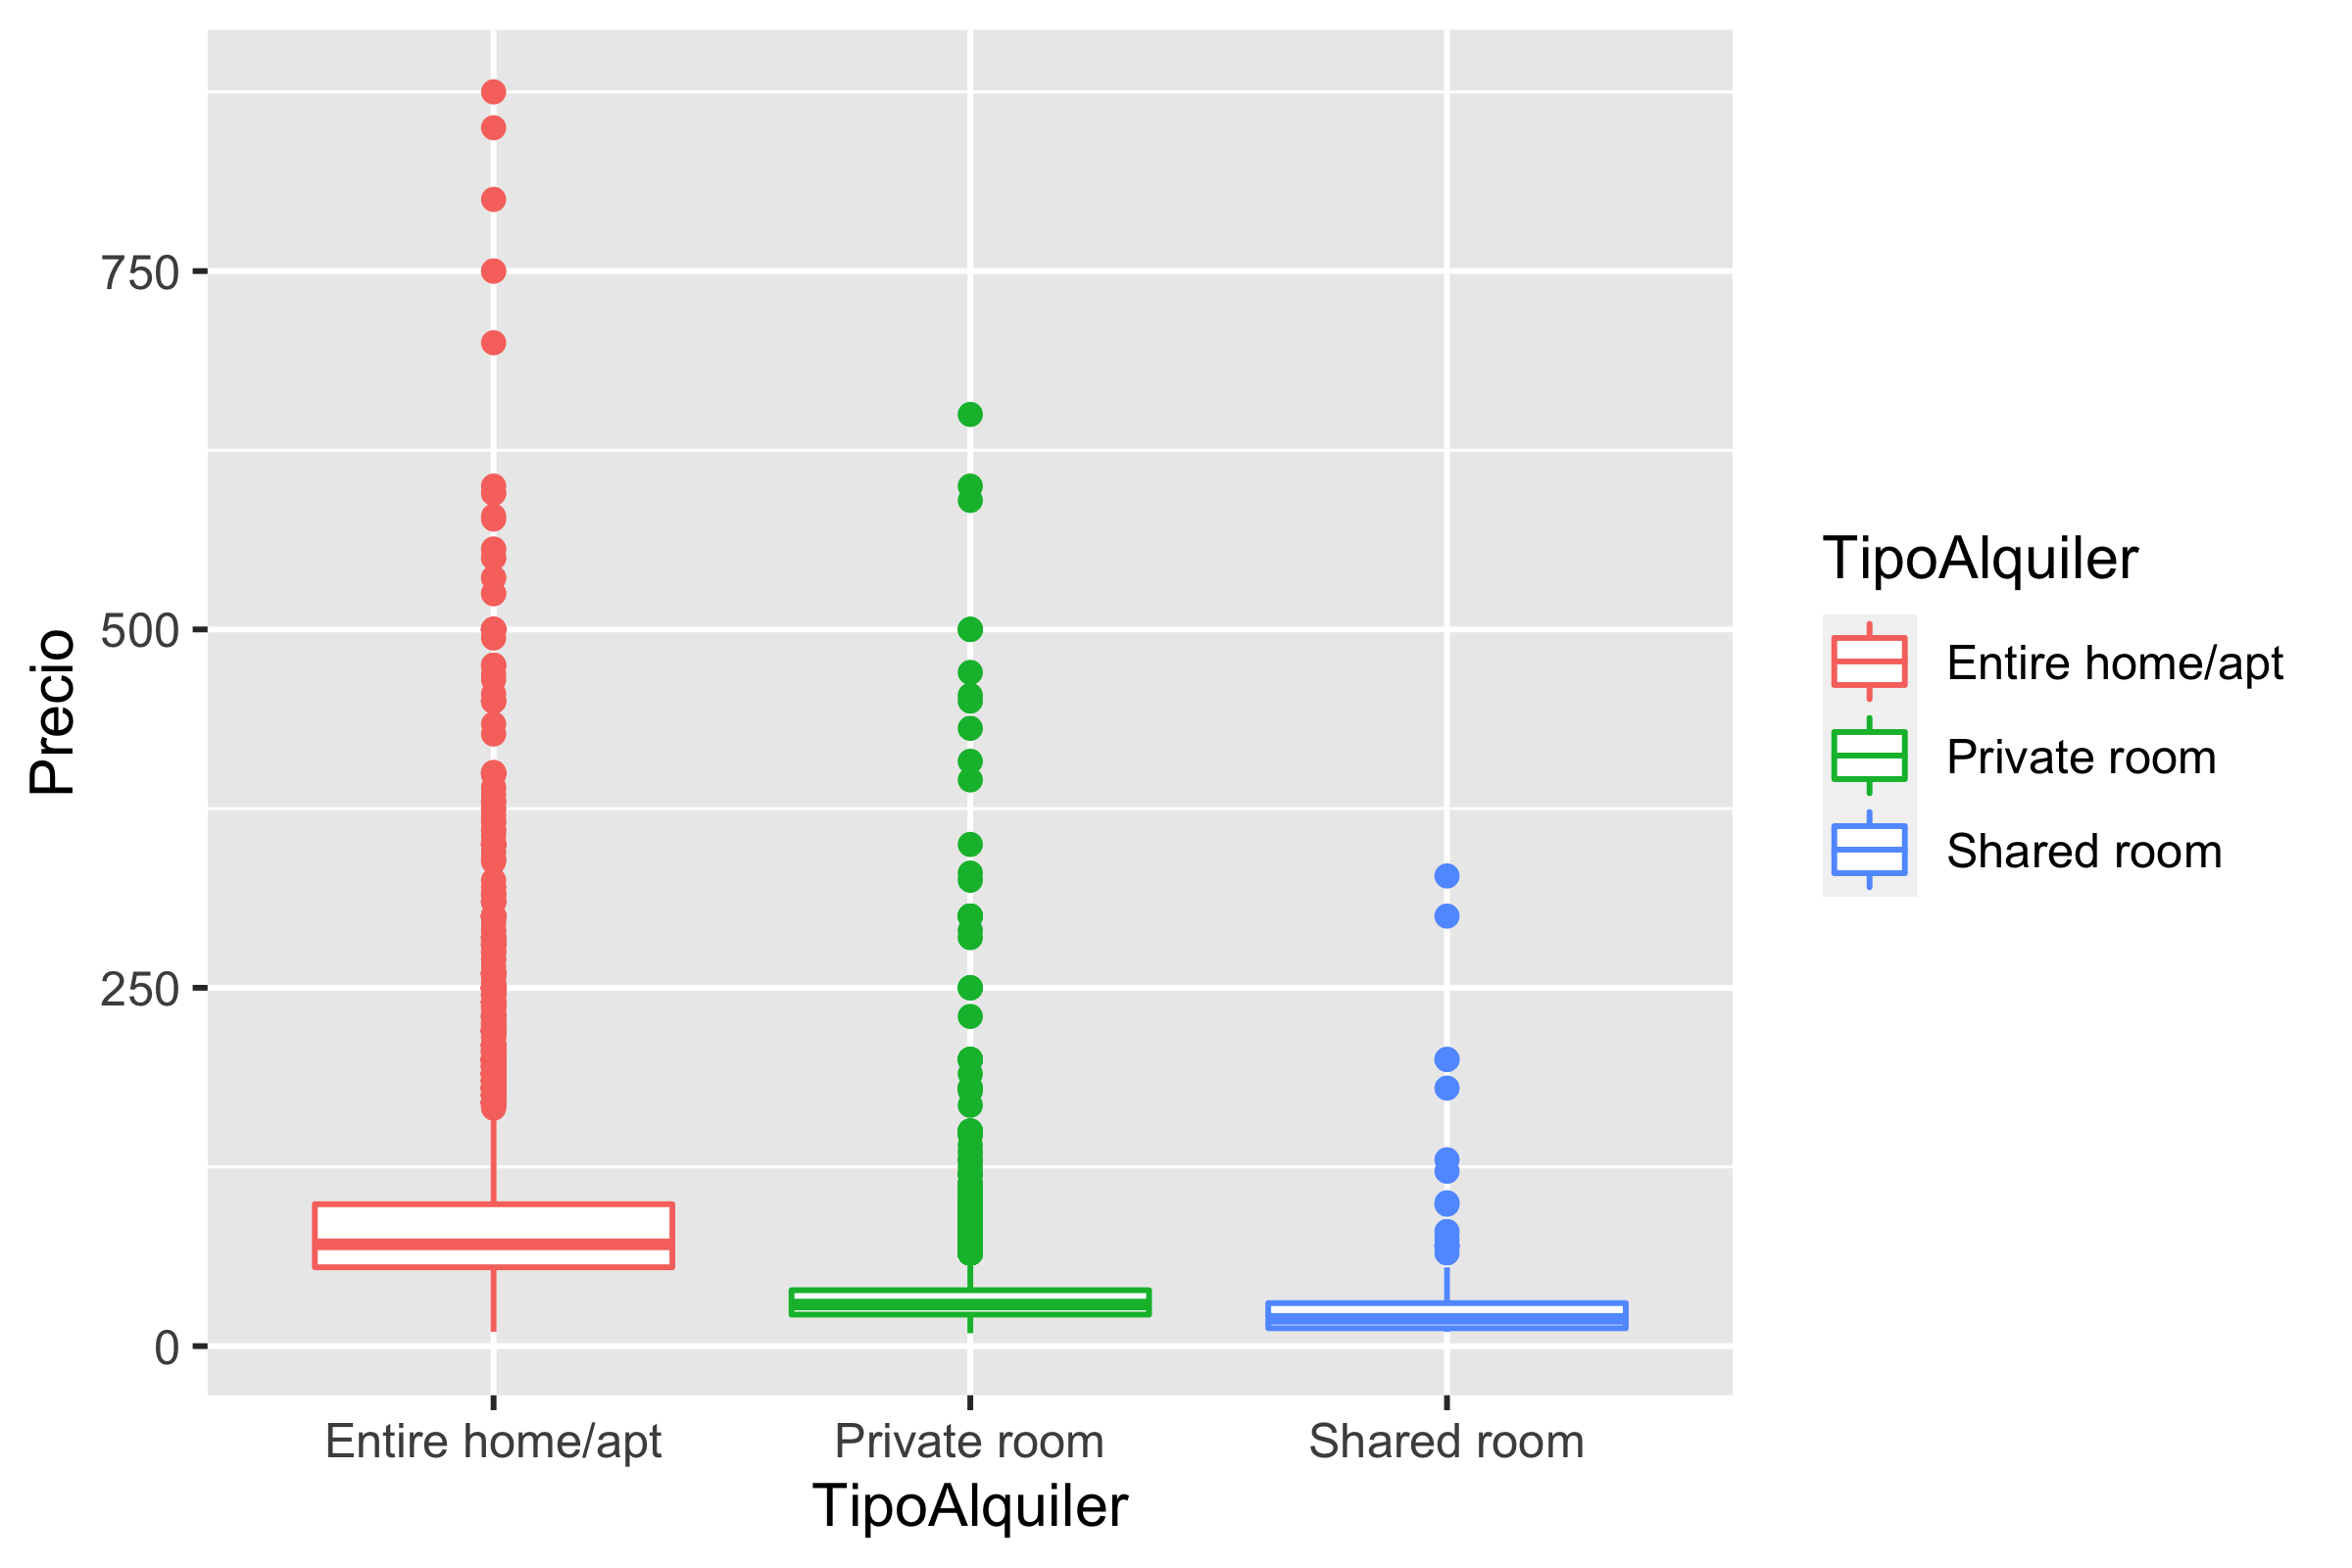

In [796]:
ggplot(data=airbnb, aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+
    geom_boxplot()

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [817]:
airbnbTipoPre <- data.frame(subset(airbnb, select = c(TipoAlquiler, Precio)))

airbnbShrRoom <- data.frame(subset(airbnb, TipoAlquiler == "Shared room"))
airbnbSR <- na.omit(airbnbShrRoom)
paste("El precio medio de alquiler para una habitación compartida es de: ",mean(airbnbSR$Precio),"euros")
airbnbPrivRoom <- data.frame(subset(airbnb, TipoAlquiler == "Private room"))
airbnbPR <- na.omit(airbnbPrivRoom)
paste("El precio medio de alquiler para una habitación privada es de: ",mean(airbnbPR$Precio),"euros")
airbnbEntireApt <- data.frame(subset(airbnb, TipoAlquiler == "Entire home/apt"))
airbnbEA <- na.omit(airbnbEntireApt)
paste("El precio medio de alquiler para un vivienda entera es de: ",round(mean(airbnbEA$Precio),2),"euros")

[1] "El precio medio de alquiler para una habitación compartida es de:  25 euros"

[1] "El precio medio de alquiler para una habitación privada es de:  32 euros"

[1] "El precio medio de alquiler para un vivienda entera es de:  87.1 euros"

In [828]:
N_SR <- length(airbnbShrRoom$Precio)
mean_SR <- mean(airbnbShrRoom$Precio)
sd_SR <- sd(airbnbShrRoom$Precio)

N_PR <- length(airbnbPR$Precio)
mean_PR <- mean(airbnbPR$Precio)
sd_PR <- sd(airbnbPR$Precio)

N_EA <- length(airbnbEA$Precio)
mean_EA <- mean(airbnbEA$Precio)
sd_EA <- sd(airbnbEA$Precio)


In [830]:
set.seed(123)

a1<-rnorm(N_SR,mean_SR,sd_SR)
a2<-rnorm(N_PR,mean_PR,sd_PR)
a3<-rnorm(N_EA,mean_EA,sd_EA)

ma1<-mean(a1)
ma2<-mean(a2)
ma3<-mean(a3)
ma<-mean(c(a1,a2,a3))
masq_between_group<-n1*(ma1-ma)^2+n2*(ma2-ma)^2+n3*(ma3-ma)^2
df_between_group<-3-1
mean_square_value_between_group<-masq_between_group/df_between_group

masq_within_group<-sum((a1-ma1)^2)+sum((a2-ma2)^2)+sum((a3-ma3)^2)
df_within_group<-n1-1+n2-1+n3-1
mean_square_value_within_group<-masq_within_group/df_within_group

F<-mean_square_value_between_group/mean_square_value_within_group
F

pvalue<-1-pf(F,df_between_group,df_within_group)
print(paste("El pvalor es",pvalue))
paste("Hemos elegido el test de Annova para relacionar las tres variables respecto al precio. Un p-valor tan bajo rechaza la hipótesis nula, por lo que no se aprecia dependencia entre variables")


[1] 10.52405

[1] "El pvalor es 4.66529502598512e-05"


[1] "Hemos elegido el test de Annova para relacionar las tres variables respecto al precio. Un p-valor tan bajo rechaza la hipótesis nula, por lo que no se aprecia dependencia entre variables"

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [245]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler == "Entire home/apt", ]

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [246]:
summary(airbnb_entire$Barrio)

Embajadores                  Universidad 
                        1228                          984 
                     Palacio                          Sol 
                         769                          701 
                      Cortes                     Justicia 
                         574                          534 
                   Trafalgar                    Argüelles 
                         223                          143 
                        Goya              Palos de Moguer 
                         142                          135 
                   Recoletos                     Arapiles 
                         135                           98 
                     Almagro                   Guindalera 
                          97                           82 
            Puerta del Angel                   Castellana 
                          77                           73 
              Cuatro Caminos                        Lista 
                          72                           72 
                       Ibiza                    Jerónimos 
                          64                           62 
                    Pacífico                      Acacias 
                          62                           61 
                  Gaztambide                   Rios Rosas 
                          61                           60 
              Hispanoamérica                     Delicias 
                          52                           51 
                 Prosperidad                Bellas Vistas 
                          49                           45 
                 Castillejos                     Imperial 
                          44                           42 
                Nueva España                Casa de Campo 
                          42                           41 
                  San Isidro             Fuente del Berro 
                          39                           38 
                  Berruguete                      Chopera 
                          35                           34 
                    Numancia                      Adelfas 
                          34                           33 
                Vallehermoso                Ciudad Jardín 
                          33                           32 
                   San Diego                       Ventas 
                          32                           26 
                    Almenara                Valdeacederas 
                          25                           25 
                     El Viso                 Valdefuentes 
                          24                           24 
                Vista Alegre                     Castilla 
                          22                           21 
                    Comillas                     Simancas 
                          21                           21 
                    Valverde                  Almendrales 
                          19                           18 
 Casco Histórico de Vallecas                     Moscardó 
                          18                           18 
                    Quintana                   Concepción 
                          17                           16 
                    Canillas                   Niño Jesús 
                          15                           15 
                     Legazpi                Puerta Bonita 
                          14                           14 
        Ciudad Universitaria                  Costillares 
                          13                           13 
                      Lucero                 Pueblo Nuevo 
                          13                           13 
           San Juan Bautista                   Buenavista 
                          13                           12 
                  San Andrés                   Peñagrande 
                          12                           11 
     

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [404]:
airbnb_BarrioPrecio <- data.frame(aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE))
airbnb_BarrioPrecio <- airbnb_BarrioPrecio[with(airbnb_BarrioPrecio, order(-airbnb_BarrioPrecio$Precio)), ]
airbnb_BarrioPrecio
#Palomas = 309.75, Fuentelareina = 180.00, Recoletos = 161.92, El Plantío = 150.00, Castellana = 141.38 

Barrio                     Precio   
77  Palomas                    309.75000
50  Fuentelareina              180.00000
93  Recoletos                  161.92537
43  El Plantío                 150.00000
29  Castellana                 141.38889
26  Casco Histórico de Barajas 141.25000
6   Alameda de Osuna           138.75000
34  Ciudad Universitaria       138.30769
58  Jerónimos                  131.82258
82  Peñagrande                 127.63636
71  Nueva España               127.30952
52  Goya                       111.33803
7   Almagro                    109.18557
23  Canillas                   105.80000
55  Hispanoamérica             104.44231
56  Ibiza                      102.62500
117 Vinateros                  102.50000
68  Mirasierra                 101.28571
106 Sol                        100.75036
15  Arcos                      100.50000
25  Casa de Campo               98.85366
108 Trafalgar                   98.57848
59  Justicia                    98.25468
12  Apostol Santiago            96.60000
39  Costillares                 95.07692
38  Cortes                      94.39373
76  Palacio                     93.30599
47  Estrella                    92.66667
114 Vallehermoso                92.39394
24  Canillejas                  91.66667
... ...                        ...      
20  Buenavista                 57.91667 
105 Simancas                   57.14286 
36  Comillas                   56.66667 
98  San Cristobal              56.50000 
46  Entrevías                  56.25000 
69  Moscardó                   56.05556 
10  Aluche                     55.88889 
32  Chopera                    55.02941 
86  Portazgo                   55.00000 
5   Aguilas                    54.50000 
19  Berruguete                 53.85714 
113 Valdezarza                 53.33333 
48  Fontarrón                  51.80000 
18  Bellas Vistas              51.77778 
73  Opañel                     51.60000 
97  San Andrés                 50.91667 
116 Ventas                     50.03846 
66  Marroquina                 50.00000 
81  Pavones                    48.00000 
119 Zofío                      48.00000 
104 Santa Eugenia              47.00000 
1   Abrantes                   46.00000 
22  Campamento                 45.55556 
74  Orcasur                    45.00000 
99  San Diego                  44.34375 
21  Butarque                   42.00000 
54  Hellín                     42.00000 
4   Aeropuerto                 38.00000 
11  Ambroz                     34.50000 
79  Palomeras Sureste          31.50000

¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [248]:
airbnb_Caros <- airbnb[airbnb$Barrio == "Palomas" | airbnb$Barrio == "Fuentelareina" | airbnb$Barrio == "Recoletos" | airbnb$Barrio == "El Plantío" | airbnb$Barrio == "Castellana",]
summary(airbnb_Caros) 
Street <- c("Recoletos","Castellana","Palomas","El Plantío","Fuentelareina")
PreMean <- c("161.92","141.38","309.75", "150.00", "180.00")
Entry <- c("172", "97", "12", "3", "3")
airbnb_Top <- data.frame(Barrio=Street, PrecioMedio=PreMean, Entradas=Entry)
airbnb_Top

  CodigoPostal           Barrio            TipoPropiedad          TipoAlquiler
 28001  :145   Recoletos    :172   Apartment      :237   Entire home/apt:215  
 28006  : 82   Castellana   : 97   House          : 20   Private room   : 70  
 28042  : 12   Palomas      : 12   Condominium    :  8   Shared room    :  2  
 28009  : 11   El Plantío   :  3   Bed & Breakfast:  6                        
 28014  :  5   Fuentelareina:  3   Other          :  6                        
 (Other): 11   Abrantes     :  0   Loft           :  5                        
 NA's   : 21   (Other)      :  0   (Other)        :  5                        
  MaxOcupantes      NumBanyos    NumDormitorios      NumCamas     
 Min.   : 1.000   Min.   :0.00   Min.   : 0.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.:1.00   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median :1.00   Median : 1.000   Median : 2.000  
 Mean   : 3.631   Mean   :1.53   Mean   : 1.554   Mean   : 2.415  
 3rd Qu.: 4.000   3rd Qu.:2.00   

Barrio        PrecioMedio Entradas
1 Recoletos     161.92      172     
2 Castellana    141.38      97      
3 Palomas       309.75      12      
4 El Plantío    150.00      3       
5 Fuentelareina 180.00      3

Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [430]:
airbnb_Freq_Barrios <- as.data.frame(table(airbnb_entire$Barrio))
colnames(airbnb_Freq_Barrios)[1]<-"Barrio"
summary(airbnb_BarrioPrecio)
summary(airbnb_Freq_Barrios)
airbnb_Precio_Entries <- merge(airbnb_BarrioPrecio,airbnb_Freq_Barrios, by="Barrio")
airbnb_Precio_Entries <- airbnb_Precio_Entries[with(airbnb_Precio_Entries, order(-airbnb_Precio_Entries$Freq)),]

              Barrio        Precio      
 Abrantes        :  1   Min.   : 31.50  
 Acacias         :  1   1st Qu.: 58.69  
 Adelfas         :  1   Median : 71.58  
 Aeropuerto      :  1   Mean   : 79.17  
 Aguilas         :  1   3rd Qu.: 90.89  
 Alameda de Osuna:  1   Max.   :309.75  
 (Other)         :113                   

              Barrio         Freq        
 Abrantes        :  1   Min.   :   0.00  
 Acacias         :  1   1st Qu.:   4.00  
 Adelfas         :  1   Median :  13.00  
 Aeropuerto      :  1   Mean   :  63.22  
 Aguilas         :  1   3rd Qu.:  41.00  
 Alameda de Osuna:  1   Max.   :1228.00  
 (Other)         :119                    

Barrio            Precio    Freq
45  Embajadores        73.70497 1228
109 Universidad        79.39674  984
76  Palacio            93.30599  769
106 Sol               100.75036  701
38  Cortes             94.39373  574
59  Justicia           98.25468  534
108 Trafalgar          98.57848  223
16  Argüelles          89.57343  143
52  Goya              111.33803  142
80  Palos de Moguer    73.31852  135
93  Recoletos         161.92537  135
13  Arapiles           69.62245   98
7   Almagro           109.18557   97
53  Guindalera         76.98780   82
91  Puerta del Angel   59.67532   77
29  Castellana        141.38889   73
40  Cuatro Caminos     76.65278   72
62  Lista              90.11111   72
56  Ibiza             102.62500   64
58  Jerónimos         131.82258   62
75  Pacífico           89.72581   62
2   Acacias            68.16393   61
51  Gaztambide         86.68852   61
95  Rios Rosas         83.00000   60
55  Hispanoamérica    104.44231   52
42  Delicias           66.00000   51
88  Prosperidad        79.46939   49
18  Bellas Vistas      51.77778   45
31  Castillejos        88.70455   44
57  Imperial           61.42857   42
... ...               ...       ... 
107 Timón              72.20000 5   
6   Alameda de Osuna  138.75000 4   
15  Arcos             100.50000 4   
46  Entrevías          56.25000 4   
77  Palomas           309.75000 4   
79  Palomeras Sureste  31.50000 4   
119 Zofío              48.00000 4   
1   Abrantes           46.00000 3   
24  Canillejas         91.66667 3   
47  Estrella           92.66667 3   
60  La Paz             65.33333 3   
85  Piovera            85.00000 3   
87  Pradolongo         61.33333 3   
113 Valdezarza         53.33333 3   
4   Aeropuerto         38.00000 2   
5   Aguilas            54.50000 2   
11  Ambroz             34.50000 2   
50  Fuentelareina     180.00000 2   
64  Los Rosales        75.00000 2   
66  Marroquina         50.00000 2   
98  San Cristobal      56.50000 2   
104 Santa Eugenia      47.00000 2   
112 Valdemarín         70.50000 2   
117 Vinateros         102.50000 2   
21  Butarque           42.00000 1   
43  El Plantío        150.00000 1   
54  Hellín             42.00000 1   
74  Orcasur            45.00000 1   
81  Pavones            48.00000 1   
86  Portazgo           55.00000 1

In [434]:
masDe100Entries <- filter(airbnb_Precio_Entries, Freq > 100)
masDe100Entries[with(masDe100Entries, order(-masDe100Entries$Precio)),]

#Los barrios con los precios más altos de media y que cumplan la condición de tener más de 100 entradas:

Barrio          Precio    Freq
11 Recoletos       161.92537  135
9  Goya            111.33803  142
4  Sol             100.75036  701
7  Trafalgar        98.57848  223
6  Justicia         98.25468  534
5  Cortes           94.39373  574
3  Palacio          93.30599  769
8  Argüelles        89.57343  143
2  Universidad      79.39674  984
1  Embajadores      73.70497 1228
10 Palos de Moguer  73.31852  135

Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

In [495]:
Recoletos <- filter(airbnb_entire, Barrio == "Recoletos")
Recoletos_Precios <- na.omit(Recoletos$Precio)
N_Recoletos <- length(Recoletos_Precios)
mean_Recoletos <- mean(Recoletos_Precios)
sd_Recoletos <- sd(Recoletos_Precios)

A_Recoletos <- rnorm(N_Recoletos, mean_Recoletos, sd_Recoletos)
B_Recoletos <- A_Recoletos + rnorm(N_Recoletos, mean_Recoletos, sd_Recoletos)
df_Recoletos <- data.frame(A_Recoletos,B_Recoletos)

Grafica_Recoletos <- ggplot(df_Recoletos, aes(x=Recoletos_Precios)) + 
  geom_density()+
theme_bw()

In [496]:
Goya <- filter(airbnb_entire, Barrio == "Goya")
Goya_Precios <- na.omit(Goya$Precio)
N_Goya <- length(Goya_Precios)
mean_Goya <- mean(Goya_Precios)
sd_Goya <- sd(Goya_Precios)

A_Goya <- rnorm(N_Goya, mean_Goya, sd_Goya)
B_Goya <- A_Goya + rnorm(N_Goya, mean_Goya, sd_Goya)
df_Goya <- data.frame(A_Goya,B_Goya)

Grafica_Goya <- ggplot(df_Goya, aes(x=Goya_Precios)) + 
  geom_density()+
theme_bw()

In [497]:
Sol <- filter(airbnb_entire, Barrio == "Sol")
Sol_Precios <- na.omit(Sol$Precio)
N_Sol <- length(Sol_Precios)
mean_Sol <- mean(Sol_Precios)
sd_Sol <- sd(Sol_Precios)

A_Sol <- rnorm(N_Sol, mean_Sol, sd_Sol)
B_Sol <- A_Sol + rnorm(N_Sol, mean_Sol, sd_Sol)
df_Sol <- data.frame(A_Sol,B_Sol)

Grafica_Sol <- ggplot(df_Sol, aes(x=Sol_Precios)) + 
  geom_density()+
theme_bw()

In [498]:
Trafalgar <- filter(airbnb_entire, Barrio == "Trafalgar")
Trafalgar_Precios <- na.omit(Trafalgar$Precio)
N_Trafalgar <- length(Trafalgar_Precios)
mean_Trafalgar <- mean(Trafalgar_Precios)
sd_Trafalgar <- sd(Trafalgar_Precios)

A_Trafalgar <- rnorm(N_Trafalgar, mean_Trafalgar, sd_Trafalgar)
B_Trafalgar <- A_Trafalgar + rnorm(N_Trafalgar, mean_Trafalgar, sd_Trafalgar)
df_Trafalgar <- data.frame(A_Trafalgar,B_Trafalgar)

Grafica_Trafalgar <- ggplot(df_Trafalgar, aes(x=Trafalgar_Precios)) + 
  geom_density()+
theme_bw()

In [499]:
Justicia <- filter(airbnb_entire, Barrio == "Justicia")
Justicia_Precios <- na.omit(Justicia$Precio)
N_Justicia <- length(Justicia_Precios)
mean_Justicia <- mean(Justicia_Precios)
sd_Justicia <- sd(Justicia_Precios)

A_Justicia <- rnorm(N_Justicia, mean_Justicia, sd_Justicia)
B_Justicia <- A_Justicia + rnorm(N_Justicia, mean_Justicia, sd_Justicia)
df_Justicia <- data.frame(A_Justicia,B_Justicia)

Grafica_Justicia <- ggplot(df_Justicia, aes(x=Justicia_Precios)) + 
  geom_density()+
theme_bw()

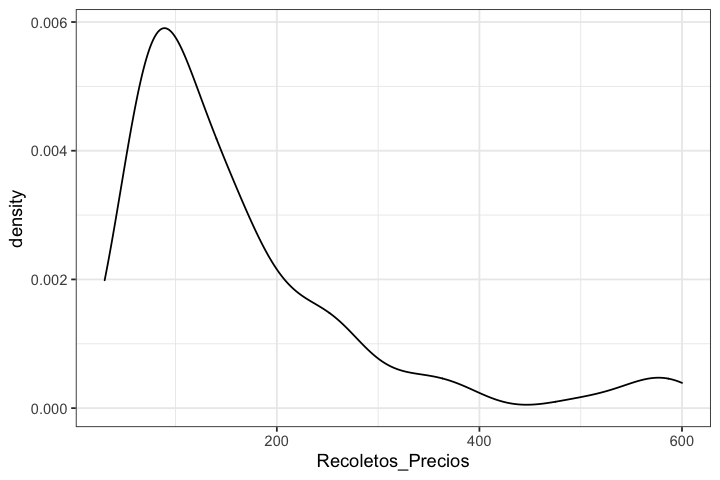

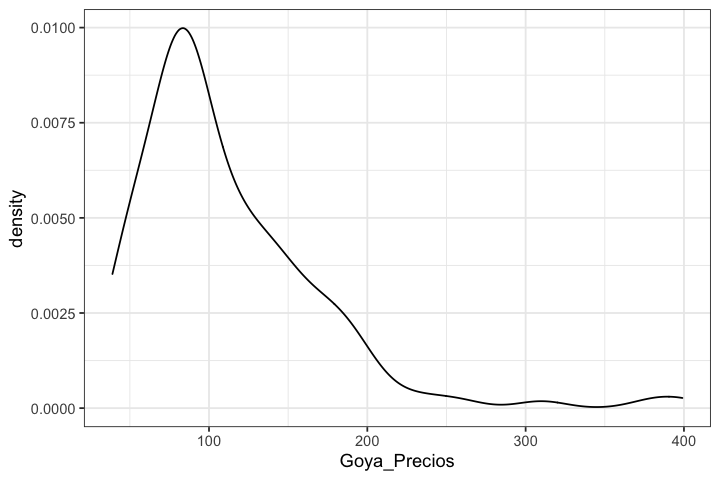

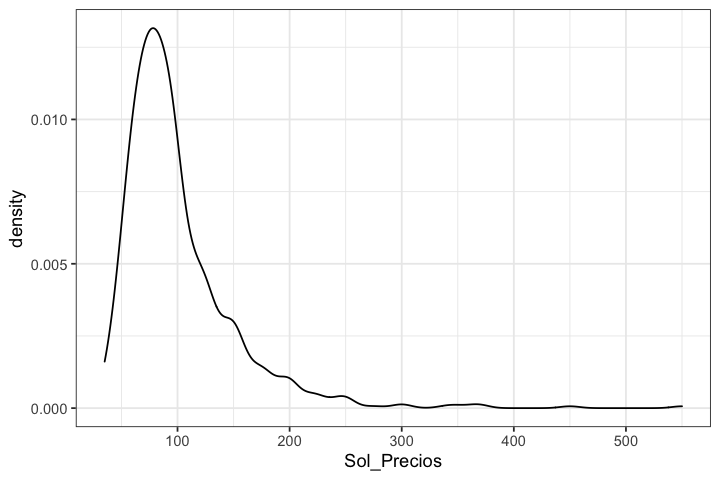

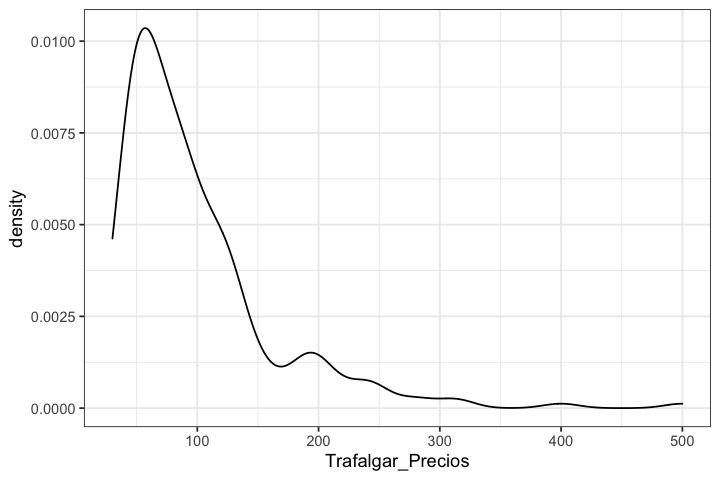

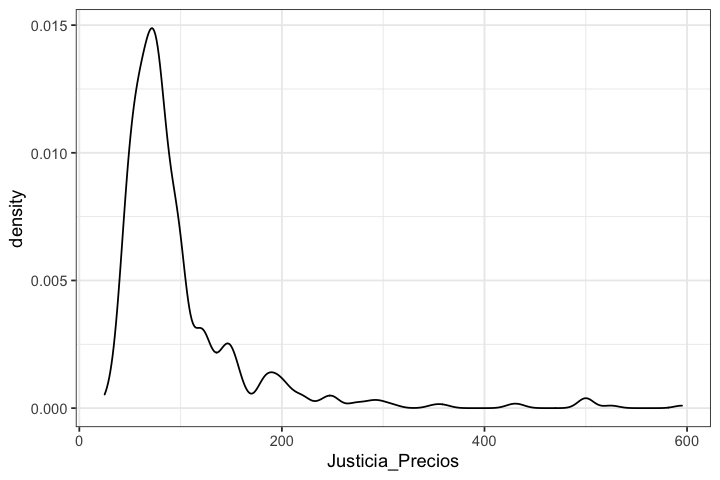

In [500]:
Grafica_Recoletos
Grafica_Goya
Grafica_Sol
Grafica_Trafalgar
Grafica_Justicia

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [530]:
airbnb_Cinco <- filter(airbnb_entire, Barrio == "Recoletos" | Barrio == "Goya" | Barrio == "Sol" | Barrio == "Trafalgar" | Barrio == "Justicia")
airbnb_CincoMedidasMean <- data.frame(aggregate(MetrosCuadrados~Barrio,airbnb_Cinco,mean,na.rm=TRUE))
airbnb_CincoMedidasMean[with(airbnb_CincoMedidasMean, order(-airbnb_CincoMedidasMean$MetrosCuadrados)),]
airbnb_CincoEntriesPrice <- filter(masDe100Entries, Barrio == "Recoletos" | Barrio == "Goya" | Barrio == "Sol" | Barrio == "Trafalgar" | Barrio == "Justicia")
airbnb_CincoEntriesPriceMedidas <- merge(airbnb_CincoEntriesPrice,airbnb_CincoMedidasMean, by="Barrio")

airbnb_CincoEntriesPriceMedidas[with(airbnb_CincoEntriesPriceMedidas, order(-airbnb_CincoEntriesPriceMedidas$Precio)),]

# La mayoría de valores del tamaño en metros del inmueble son NA



Barrio    MetrosCuadrados
1 Goya      51.68333       
4 Sol       45.61750       
5 Trafalgar 29.30429       
2 Justicia  28.52706       
3 Recoletos 26.66333

Barrio    Precio    Freq MetrosCuadrados
3 Recoletos 161.92537 135  26.66333       
1 Goya      111.33803 142  51.68333       
4 Sol       100.75036 701  45.61750       
5 Trafalgar  98.57848 223  29.30429       
2 Justicia   98.25468 534  28.52706

Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

In [535]:
#No hay datos suficiente en M^2 para pintar la curva

Recoletos_Dim <- filter(airbnb_CincoEntriesPriceMedidas, Barrio == "Recoletos")
Recoletos_MetrosCuadrados <- na.omit(Recoletos_Dim$MetrosCuadrados)
N_Recoletos_Dim <- length(Recoletos_MetrosCuadrados)
mean_Recoletos_Dim <- mean(Recoletos_MetrosCuadrados)
sd_Recoletos_Dim <- sd(Recoletos_MetrosCuadrados)

A_Recoletos_Dim <- rnorm(N_Recoletos_Dim, mean_Recoletos_Dim, sd_Recoletos_Dim)
B_Recoletos_Dim <- A_Recoletos_Dim + rnorm(N_Recoletos_Dim, mean_Recoletos_Dim, sd_Recoletos_Dim)
df_Recoletos_Dim <- data.frame(na.omit(A_Recoletos_Dim,B_Recoletos_Dim))

Grafica_Recoletos_Dim <- ggplot(df_Recoletos_Dim, aes(x=Recoletos_MetrosCuadrados)) + 
  geom_density()+
theme_bw()

Warning message in rnorm(N_Recoletos_Dim, mean_Recoletos_Dim, sd_Recoletos_Dim):
“NAs produced”Warning message in rnorm(N_Recoletos_Dim, mean_Recoletos_Dim, sd_Recoletos_Dim):
“NAs produced”

In [536]:
#No hay datos suficiente en M^2 para pintar la curva

Goya_Dim <- filter(airbnb_CincoEntriesPriceMedidas, Barrio == "Goya")
Goya_MetrosCuadrados <- na.omit(Goya_Dim$MetrosCuadrados)
N_Goya_Dim <- length(Goya_MetrosCuadrados)
mean_Goya_Dim <- mean(Goya_MetrosCuadrados)
sd_Goya_Dim <- sd(Goya_MetrosCuadrados)

A_Goya_Dim <- rnorm(N_Goya_Dim, mean_Goya_Dim, sd_Goya_Dim)
B_Goya_Dim <- A_Goya_Dim + rnorm(N_Goya_Dim, mean_Goya_Dim, sd_Goya_Dim)
df_Goya_Dim <- data.frame(na.omit(A_Goya_Dim,B_Goya_Dim))

Grafica_Goya_Dim <- ggplot(df_Goya_Dim, aes(x=Goya_MetrosCuadrados)) + 
  geom_density()+
theme_bw()

Warning message in rnorm(N_Goya_Dim, mean_Goya_Dim, sd_Goya_Dim):
“NAs produced”Warning message in rnorm(N_Goya_Dim, mean_Goya_Dim, sd_Goya_Dim):
“NAs produced”

In [537]:
#No hay datos suficiente en M^2 para pintar la curva

Sol_Dim <- filter(airbnb_CincoEntriesPriceMedidas, Barrio == "Sol")
Sol_MetrosCuadrados <- na.omit(Sol_Dim$MetrosCuadrados)
N_Sol_Dim <- length(Sol_MetrosCuadrados)
mean_Sol_Dim <- mean(Sol_MetrosCuadrados)
sd_Sol_Dim <- sd(Sol_MetrosCuadrados)

A_Sol_Dim <- rnorm(N_Sol_Dim, mean_Sol_Dim, sd_Sol_Dim)
B_Sol_Dim <- A_Sol_Dim + rnorm(N_Sol_Dim, mean_Sol_Dim, sd_Sol_Dim)
df_Sol_Dim <- data.frame(na.omit(A_Sol_Dim,B_Sol_Dim))

Grafica_Sol_Dim <- ggplot(df_Sol_Dim, aes(x=Sol_MetrosCuadrados)) + 
  geom_density()+
theme_bw()

Warning message in rnorm(N_Sol_Dim, mean_Sol_Dim, sd_Sol_Dim):
“NAs produced”Warning message in rnorm(N_Sol_Dim, mean_Sol_Dim, sd_Sol_Dim):
“NAs produced”

In [538]:
#No hay datos suficiente en M^2 para pintar la curva

Trafalgar_Dim <- filter(airbnb_CincoEntriesPriceMedidas, Barrio == "Trafalgar")
Trafalgar_MetrosCuadrados <- na.omit(Trafalgar_Dim$MetrosCuadrados)
N_Trafalgar_Dim <- length(Trafalgar_MetrosCuadrados)
mean_Trafalgar_Dim <- mean(Trafalgar_MetrosCuadrados)
sd_Trafalgar_Dim <- sd(Trafalgar_MetrosCuadrados)

A_Trafalgar_Dim <- rnorm(N_Trafalgar_Dim, mean_Trafalgar_Dim, sd_Trafalgar_Dim)
B_Trafalgar_Dim <- A_Trafalgar_Dim + rnorm(N_Trafalgar_Dim, mean_Trafalgar_Dim, sd_Trafalgar_Dim)
df_Trafalgar_Dim <- data.frame(na.omit(A_Trafalgar_Dim,B_Trafalgar_Dim))

Grafica_Trafalgar_Dim <- ggplot(df_Trafalgar_Dim, aes(x=Trafalgar_MetrosCuadrados)) + 
  geom_density()+
theme_bw()

Warning message in rnorm(N_Trafalgar_Dim, mean_Trafalgar_Dim, sd_Trafalgar_Dim):
“NAs produced”Warning message in rnorm(N_Trafalgar_Dim, mean_Trafalgar_Dim, sd_Trafalgar_Dim):
“NAs produced”

In [539]:
#No hay datos suficiente en M^2 para pintar la curva

Justicia_Dim <- filter(airbnb_CincoEntriesPriceMedidas, Barrio == "Justicia")
Justicia_MetrosCuadrados <- na.omit(Justicia_Dim$MetrosCuadrados)
N_Justicia_Dim <- length(Justicia_MetrosCuadrados)
mean_Justicia_Dim <- mean(Justicia_MetrosCuadrados)
sd_Justicia_Dim <- sd(Justicia_MetrosCuadrados)

A_Justicia_Dim <- rnorm(N_Justicia_Dim, mean_Justicia_Dim, sd_Justicia_Dim)
B_Justicia_Dim <- A_Justicia_Dim + rnorm(N_Justicia_Dim, mean_Justicia_Dim, sd_Justicia_Dim)
df_Justicia_Dim <- data.frame(na.omit(A_Justicia_Dim,B_Justicia_Dim))

Grafica_Justicia_Dim <- ggplot(df_Justicia_Dim, aes(x=Justicia_MetrosCuadrados)) + 
  geom_density()+
theme_bw()

Warning message in rnorm(N_Justicia_Dim, mean_Justicia_Dim, sd_Justicia_Dim):
“NAs produced”Warning message in rnorm(N_Justicia_Dim, mean_Justicia_Dim, sd_Justicia_Dim):
“NAs produced”

Warning message:
“Groups with fewer than two data points have been dropped.”Warning message in max(ids, na.rm = TRUE):
“ningun argumento finito para max; retornando -Inf”Warning message:
“Groups with fewer than two data points have been dropped.”Warning message in max(ids, na.rm = TRUE):
“ningun argumento finito para max; retornando -Inf”

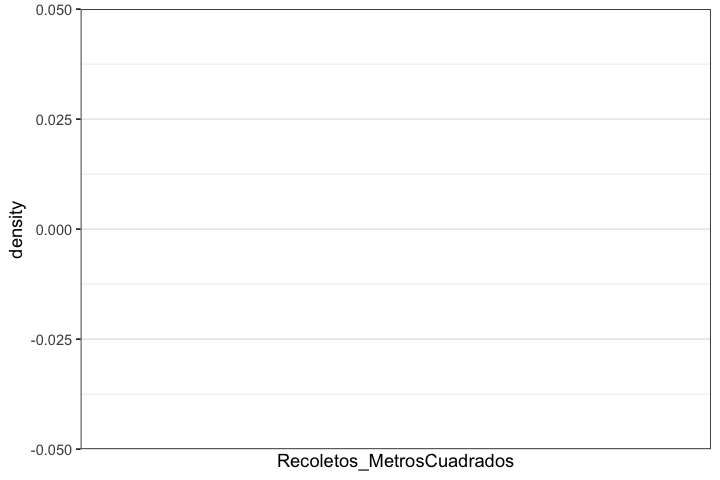

Warning message:
“Groups with fewer than two data points have been dropped.”Warning message in max(ids, na.rm = TRUE):
“ningun argumento finito para max; retornando -Inf”

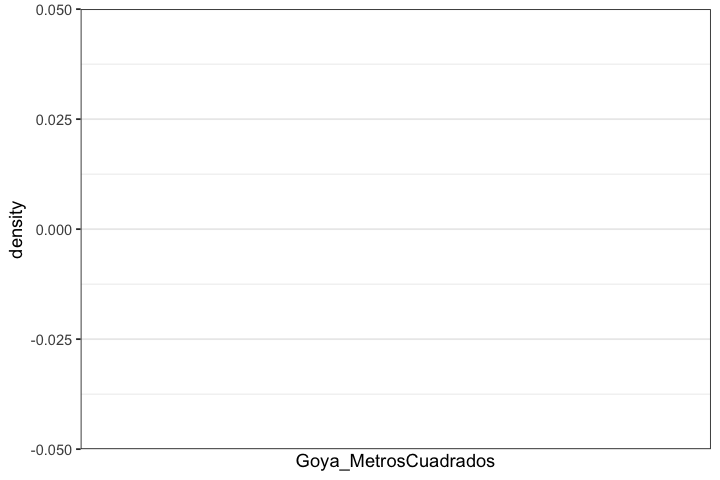

Warning message:
“Groups with fewer than two data points have been dropped.”Warning message in max(ids, na.rm = TRUE):
“ningun argumento finito para max; retornando -Inf”

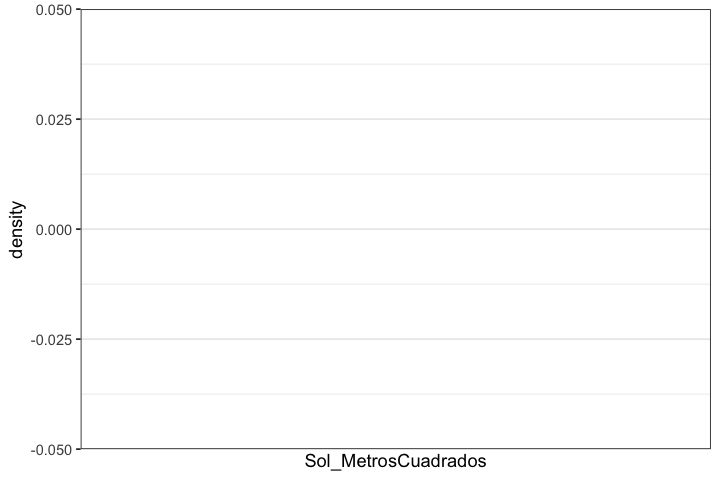

Warning message:
“Groups with fewer than two data points have been dropped.”Warning message in max(ids, na.rm = TRUE):
“ningun argumento finito para max; retornando -Inf”

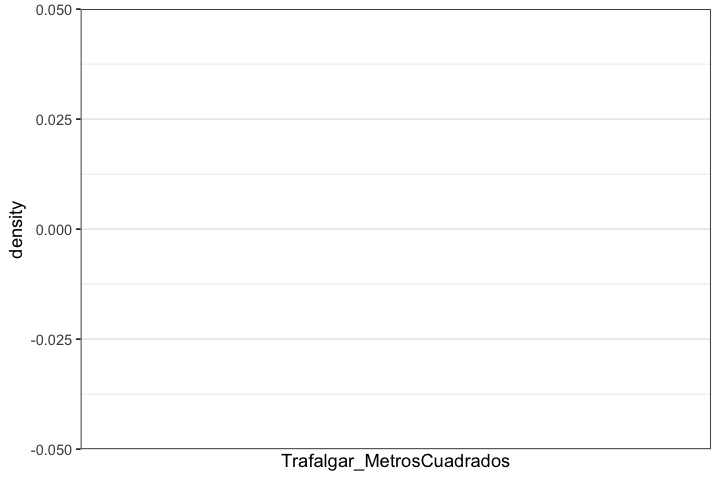

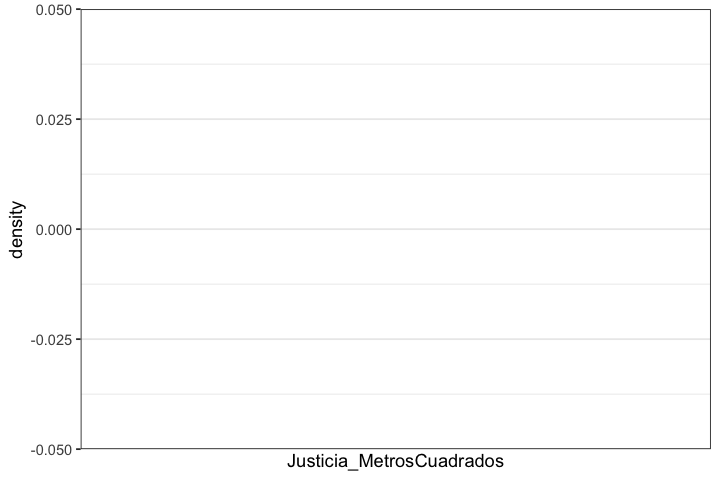

In [540]:
#No hay datos suficiente en M^2 para pintar la curva

Grafica_Recoletos_Dim
Grafica_Goya_Dim
Grafica_Sol_Dim
Grafica_Trafalgar_Dim
Grafica_Justicia_Dim

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [541]:
airbnb_CincoEntriesPriceMedidas

#Tema 7

Barrio    Precio    Freq MetrosCuadrados
1 Goya      111.33803 142  51.68333       
2 Justicia   98.25468 534  28.52706       
3 Recoletos 161.92537 135  26.66333       
4 Sol       100.75036 701  45.61750       
5 Trafalgar  98.57848 223  29.30429

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [575]:
#Buscar correlación y limpiar. Metros cuadrados no encajan bien porque hay valores con 0 metros, filtrar
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
Sol_Banyos <- barrio_sol$NumBanyos
Sol_Dorm <- barrio_sol$NumDormitorios

x<- Sol_Banyos
y <- 2*x + 1+ Sol_Dorm
paste("La correlación entre el número de baños y el número de habitaciones en Sol es de:",cor(x,y))
paste("Al superar la estimación aproximada de 0.6, podemos determinar como ALTA la correlación entre ambas variables")

[1] "La correlación entre el número de baños y el número de habitaciones en Sol es de: 0.921862914620149"

[1] "Al superar la estimación aproximada de 0.6, podemos determinar como ALTA la correlación entre ambas variables"

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

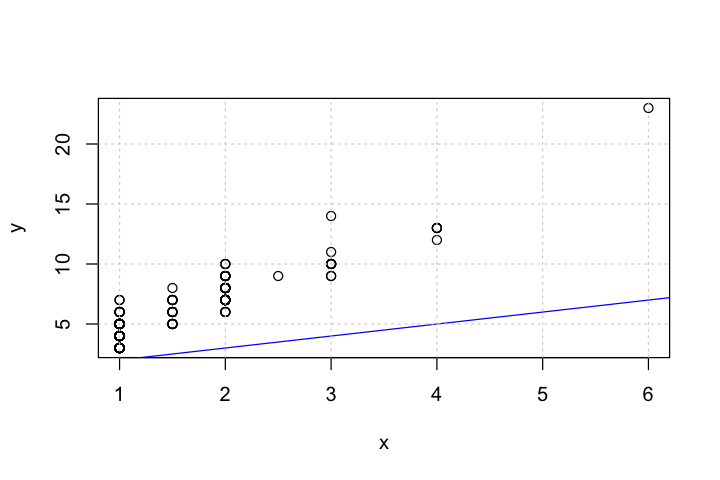

In [576]:
#Vaya, lo he hecho arriba. Dibujo aquí la gráfica

plot(x,y)
abline(Sol_Banyos, Sol_Dorm, col="blue")
grid()


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


In [638]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
barrios_NoNA<-data.frame(na.omit(barrio_sol[,c("Barrio", "MetrosCuadrados", "NumDormitorios", "Precio")]))
Metros_Dorm <- aggregate(MetrosCuadrados~NumDormitorios,barrios_NoNA,mean,na.rm=TRUE)
Metros_Dorm
#barrio_sol<-subset(barrios_NoNA,Barrio=="Sol")


NumDormitorios MetrosCuadrados
1 0               20.62625      
2 1               30.99071      
3 2               45.28067      
4 3               98.75500      
5 4              105.01000      
6 5              157.52000

In [639]:
Sol_Metros2 <- Metros_Dorm$MetrosCuadrados
Sol_Dorm2 <- Metros_Dorm$NumDormitorios

x<- Sol_Metros2
y <- 2*x + 1+ Sol_Dorm2
paste("La correlación entre el número de baños y el número de habitaciones en Sol es de:",cor(x,y))
paste("Al superar la estimación aproximada de 0.6, podemos determinar como ALTA la correlación entre ambas variables")

[1] "La correlación entre el número de baños y el número de habitaciones en Sol es de: 0.999990623050929"

[1] "Al superar la estimación aproximada de 0.6, podemos determinar como ALTA la correlación entre ambas variables"

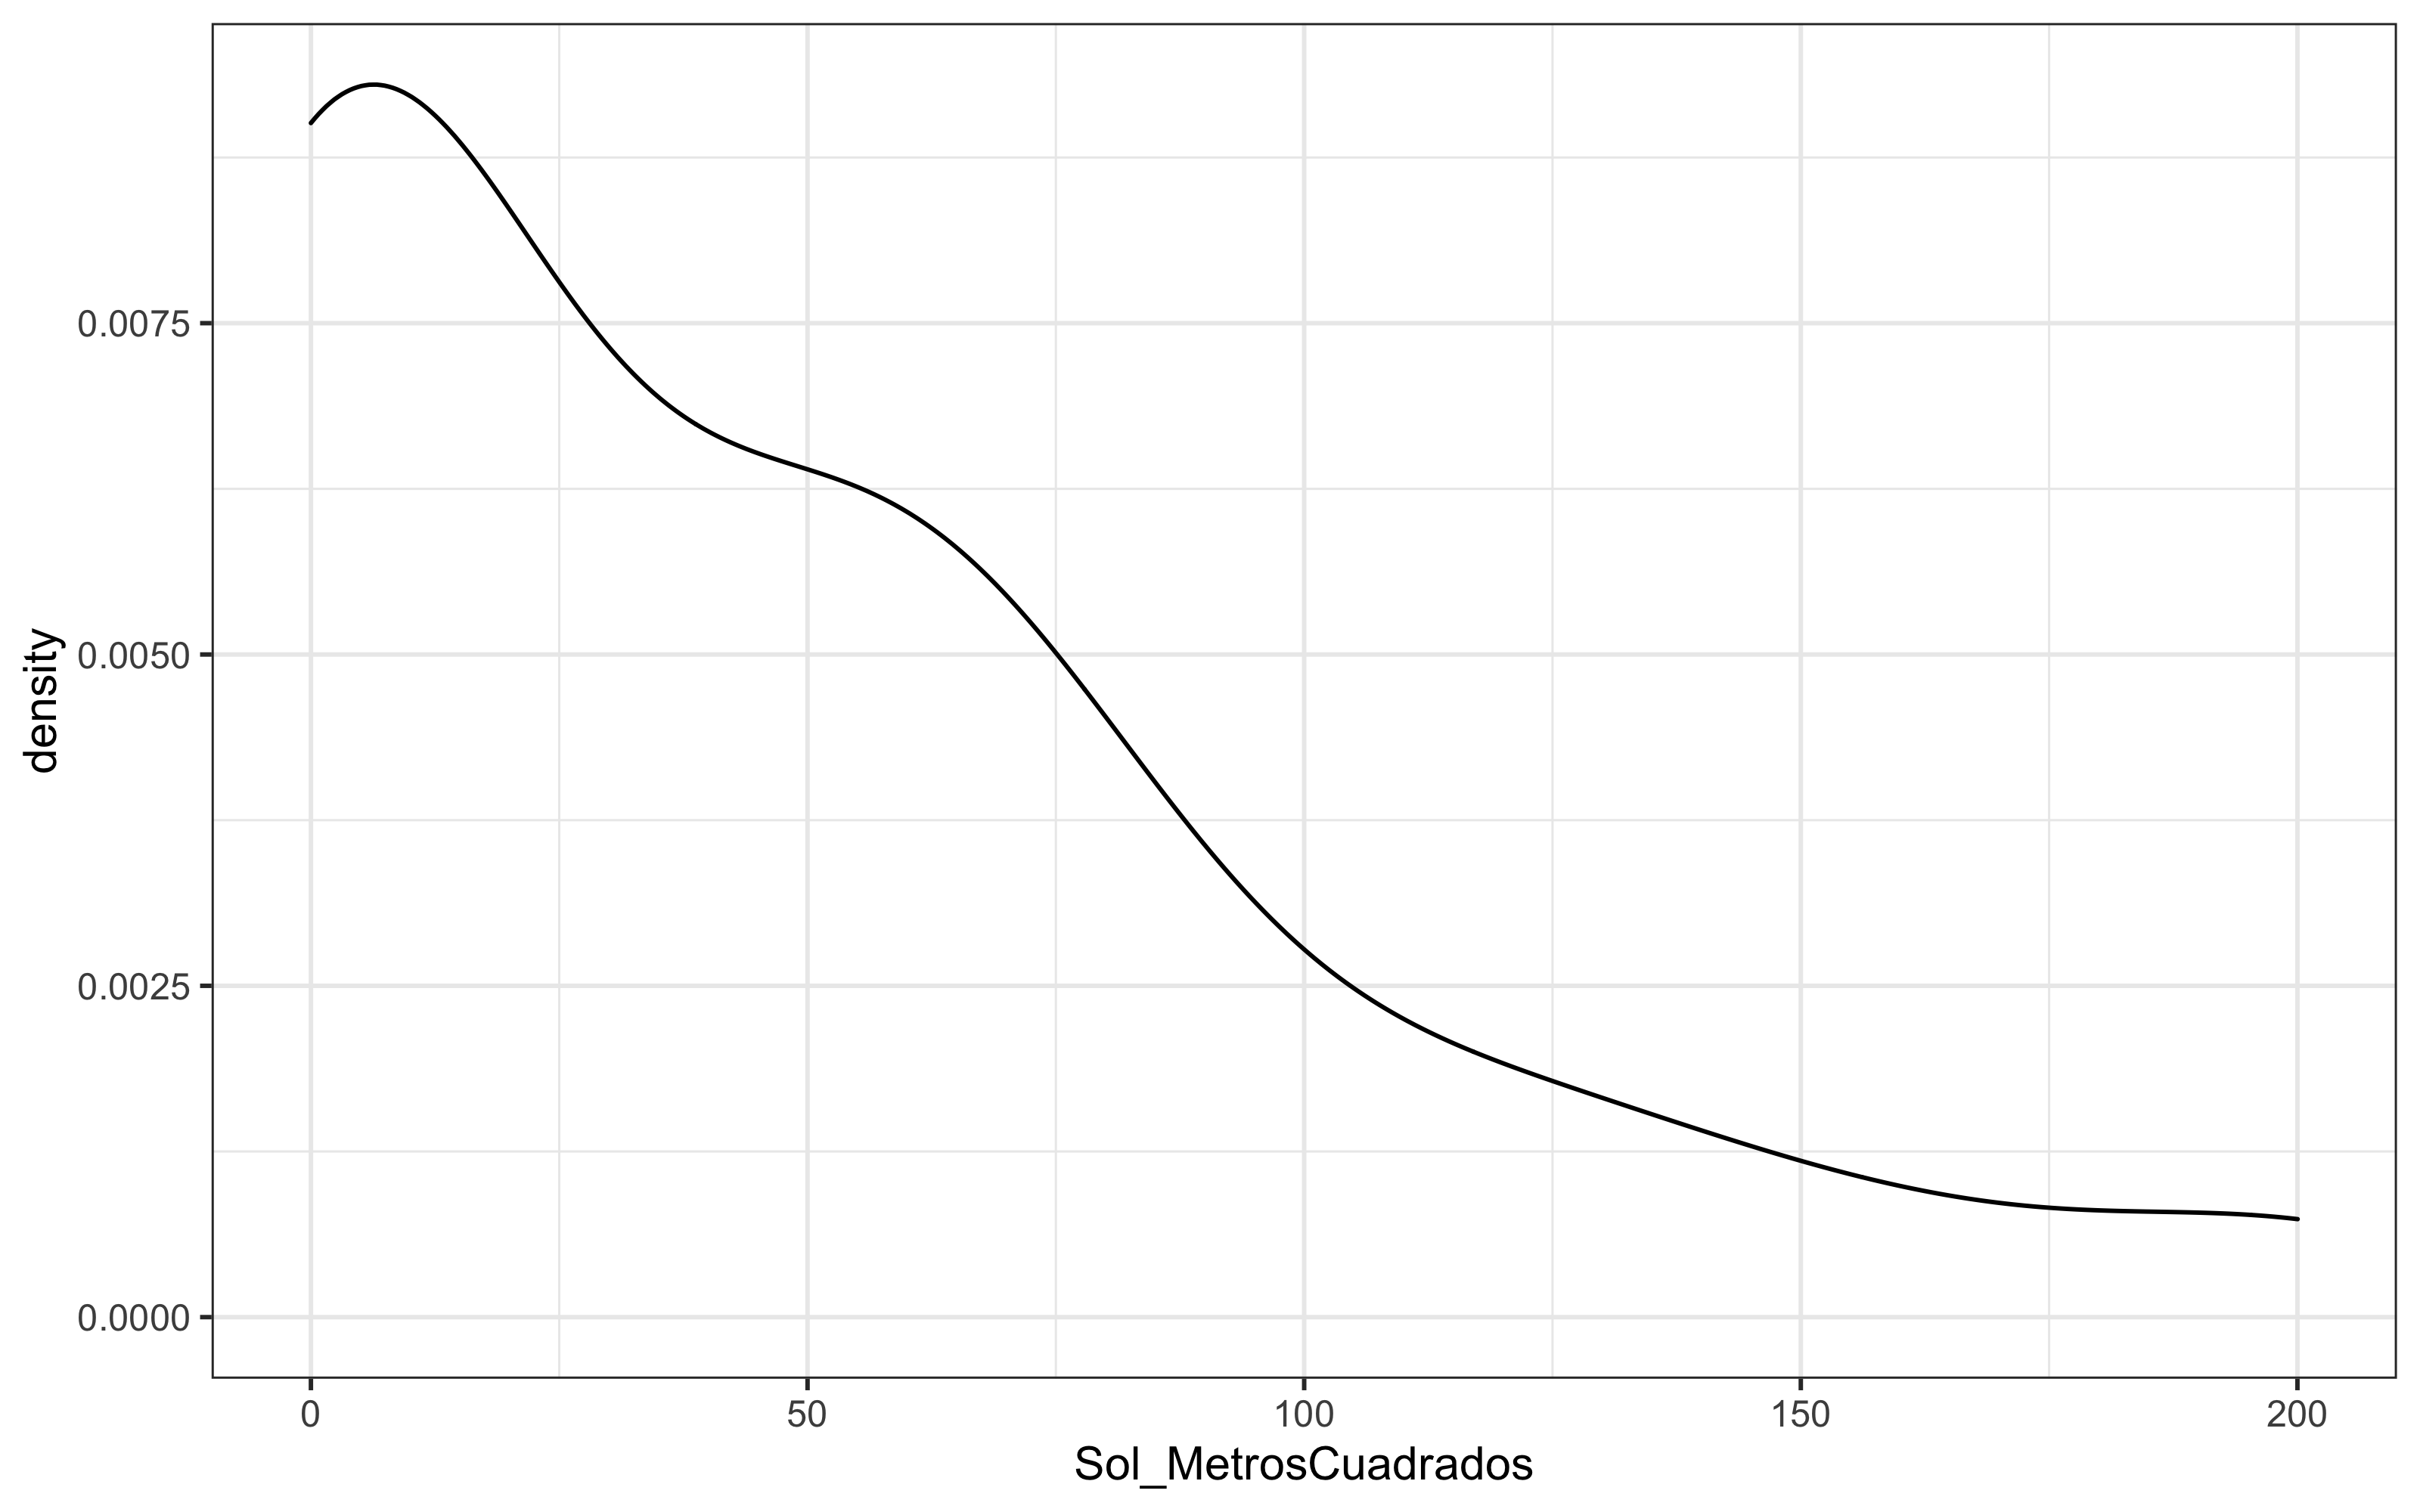

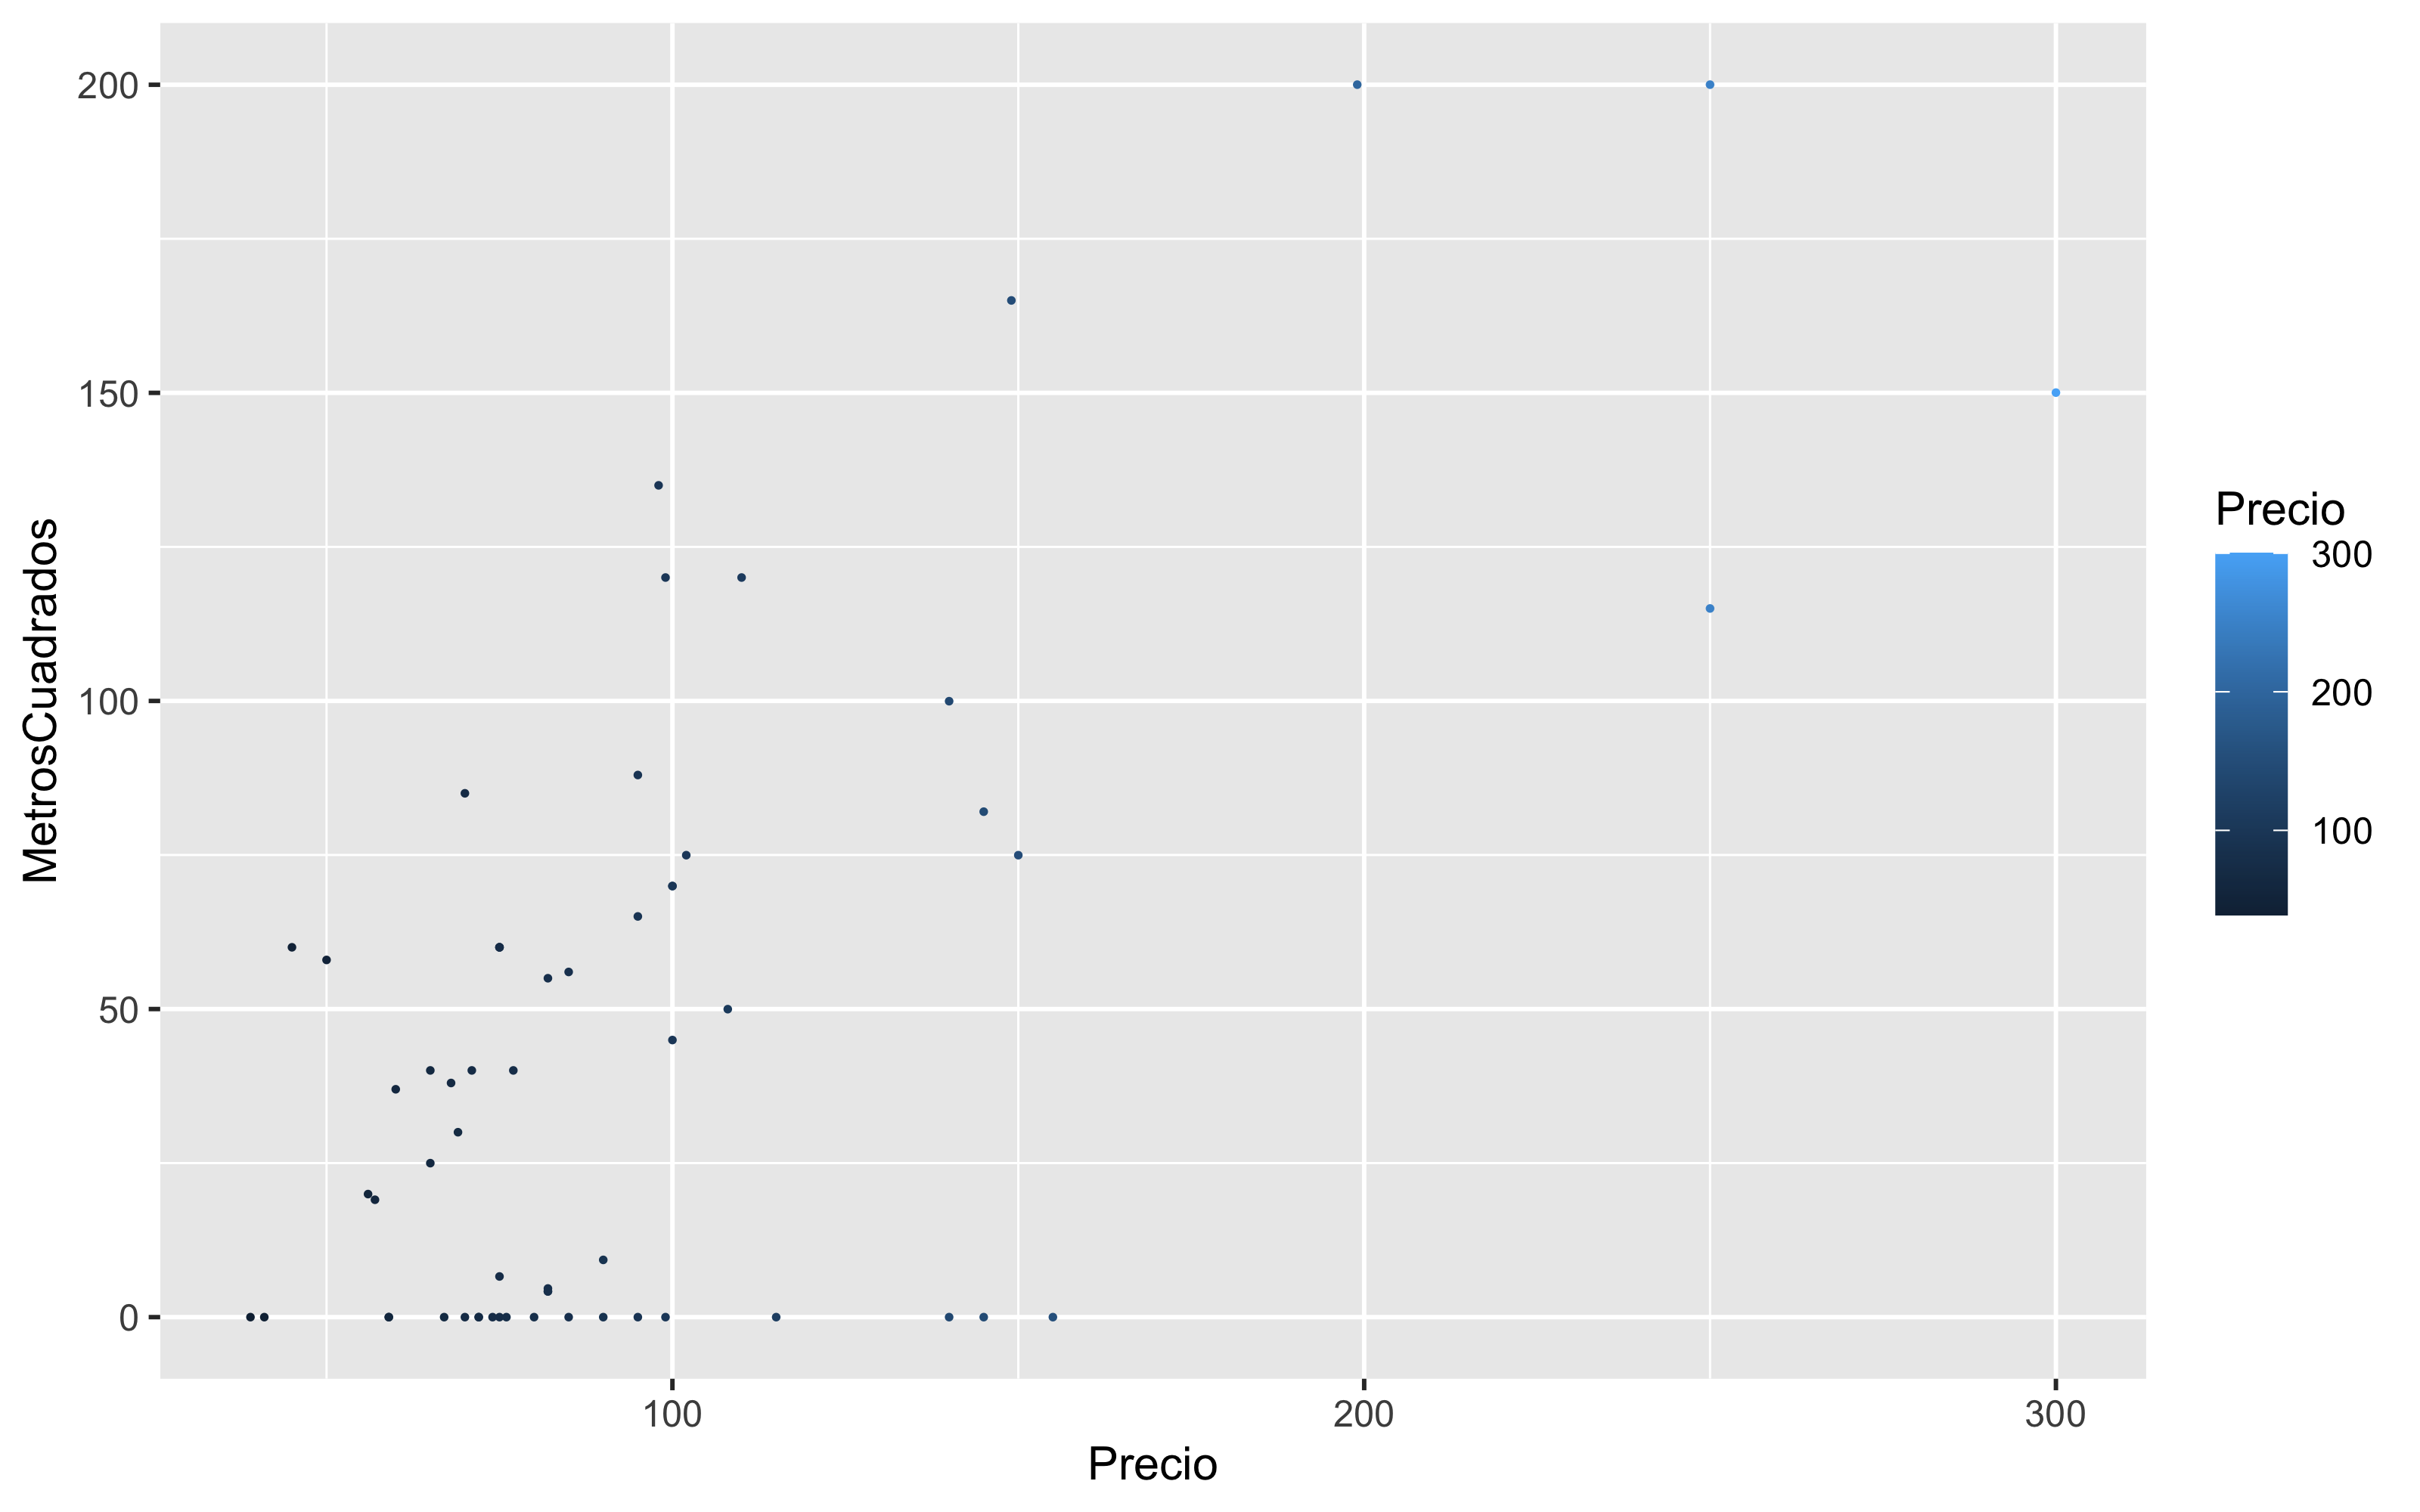

In [640]:
#Sol_Dim <- filter(airbnb_CincoEntriesPriceMedidas, Barrio == "Sol")
Sol_MetrosCuadrados <- barrios_NoNA$MetrosCuadrados
N_Sol_Dim <- length(Sol_MetrosCuadrados)
mean_Sol_Dim <- mean(Sol_MetrosCuadrados)
sd_Sol_Dim <- sd(Sol_MetrosCuadrados)

A_Sol_Dim <- rnorm(N_Sol_Dim, mean_Sol_Dim, sd_Sol_Dim)
B_Sol_Dim <- A_Sol_Dim + rnorm(N_Sol_Dim, mean_Sol_Dim, sd_Sol_Dim)
df_Sol_Dim <- data.frame(na.omit(A_Sol_Dim,B_Sol_Dim))

Grafica_Sol_Dim <- ggplot(df_Sol_Dim, aes(x=Sol_MetrosCuadrados)) + 
  geom_density()+
theme_bw()
Grafica_Sol_Dim

ggplot(barrios_NoNA,aes(x=Precio,y=MetrosCuadrados,color=Precio))+geom_point(size=0.3)

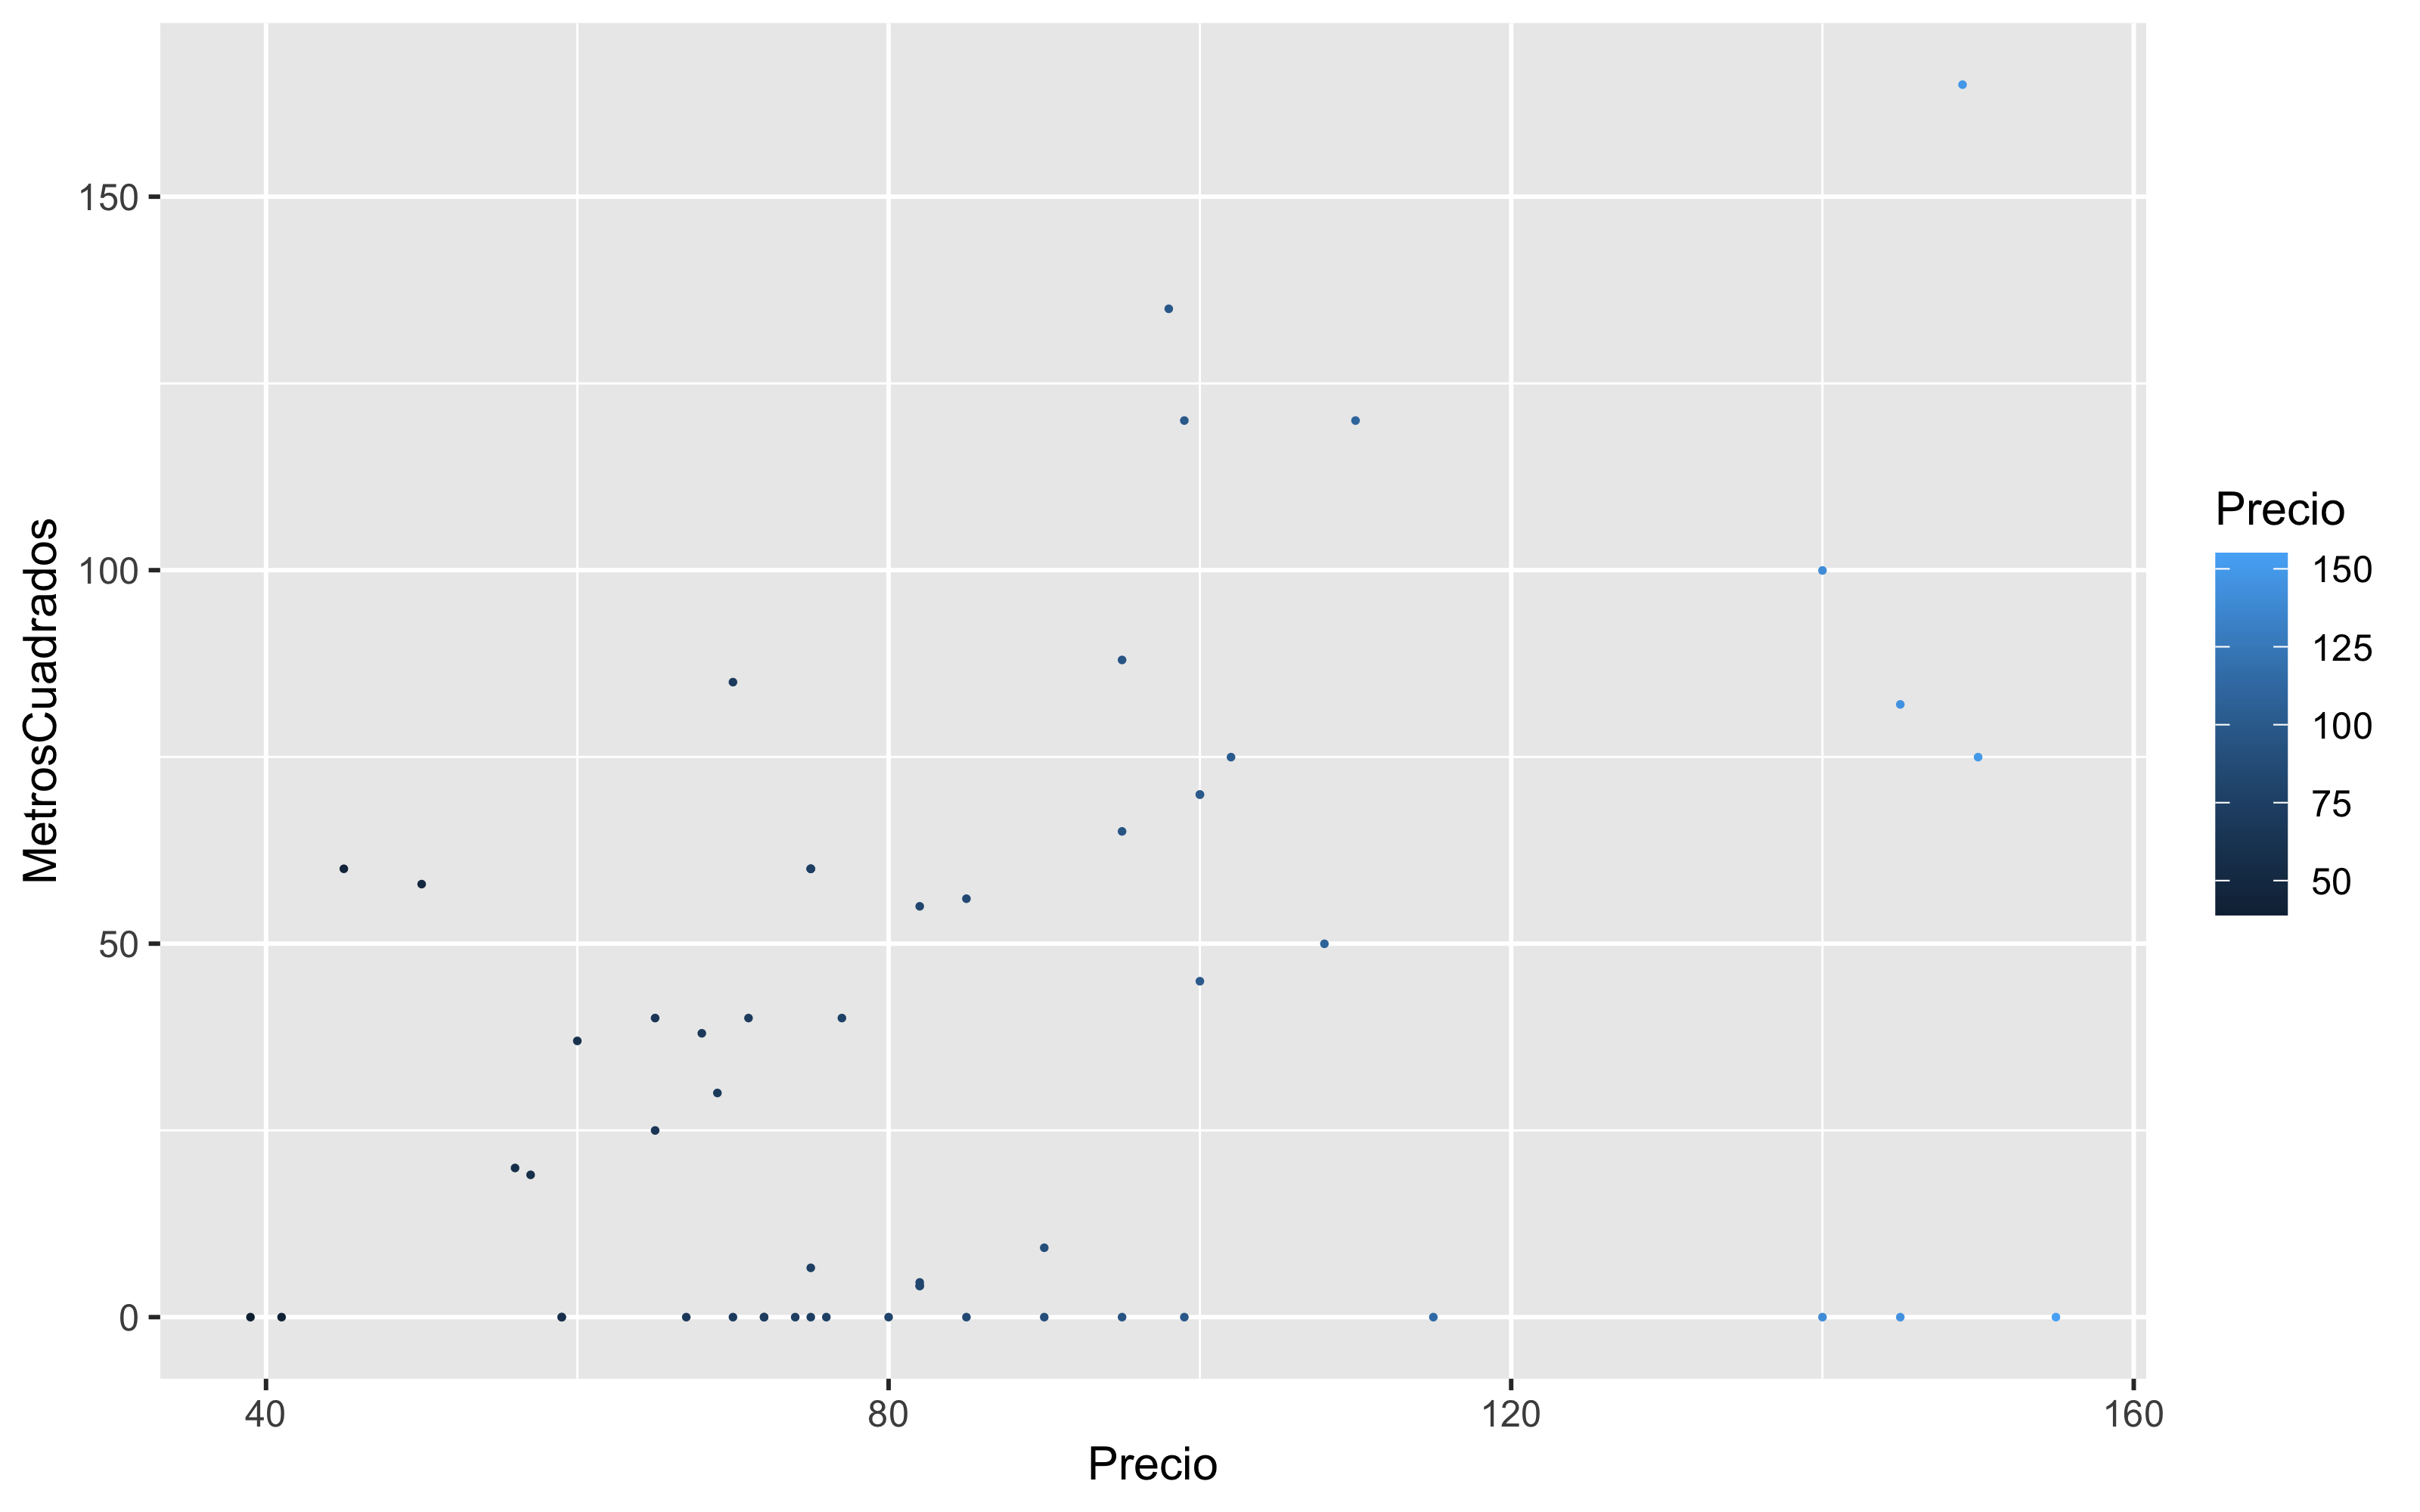

In [641]:
Sol_Clean <- subset(barrios_NoNA,Precio<180)

ggplot(Sol_Clean,aes(x=Precio,y=MetrosCuadrados,color=Precio))+geom_point(size=0.3)

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [831]:
summary(airbnb_entire)

  CodigoPostal          Barrio                TipoPropiedad 
 28012  :1435   Embajadores:1228   Apartment         :6995  
 28004  :1271   Universidad: 984   House             : 327  
 28005  : 803   Palacio    : 769   Loft              : 250  
 28013  : 721   Sol        : 701   Condominium       : 188  
 28014  : 473   Cortes     : 574   Other             : 111  
 (Other):2980   Justicia   : 534   Serviced apartment:  11  
 NA's   : 220   (Other)    :3113   (Other)           :  21  
          TipoAlquiler   MaxOcupantes      NumBanyos     NumDormitorios  
 Entire home/apt:7903   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Private room   :   0   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 Shared room    :   0   Median : 4.000   Median :1.000   Median : 1.000  
                        Mean   : 4.051   Mean   :1.241   Mean   : 1.463  
                        3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                        Max.   :16.000   Max.   :6.500   Max.   :10.

In [838]:
airbnb_entire$Puntuacion

[1]  96  91 100  90  95  84  98  NA  90  91 100  97  95  95  88  81  99  91
  [19]  87 100  93  80 100  95  88  92  97  90  95  93  89  92  93  98  80  95
  [37] 100  96  88 100 100  NA  96 100  84  95  89  58  82  98  98 100  94  71
  [55]  99  NA  92  97  94  88  94  96  93  75  94  92  80 100  95  91  81  93
  [73] 100  96  93  80 100  94  93  NA  89  88  97  97  96  97  89 100  98 100
  [91]  86  85  99  91  97  88  91  95 100  NA  80 100  83  91  97  91  92  NA
 [109]  NA  85  94  NA  97  92  84  97  90  96 100 100 100  96  89  88  99  92
 [127]  75  99  95  86  NA  93  97  94 100  93  96  87  98  93  92  92  89  89
 [145] 100  95 100  98  86  92  80  95  92  80  97  90  85  90 100  NA  NA  83
 [163]  NA  97 100  86  98  97  NA  96  93  94  94  86  98  87  95  93  NA  95
 [181]  93  80 100 100  85  NA  NA  NA  88  84  84  96  95  NA  NA  89  NA  NA
 [199] 100  88  80  97 100  91  98  88  80  94  93  90 100  97 100 100  94  80
 [217]  96  80  88  98  89 100  NA  92  96 100  88  80 100  99  NA  95  NA  85
 [235]  NA  67  92  93  80  70 100  NA  94  97  83  84 100  89  99  98  96  92
 [253]  NA  NA  92  91  82  NA  97  NA  NA  99  NA  NA  92  89  NA 100  89  82
 [271]  87  94  98  83  NA  98  89  93  94 100  NA  91  NA  90  86  99  78 100
 [289]  NA  98  NA  88  96  86  96  88  97  83  NA  93  94  NA  91  93  81  NA
 [307]  98  84  86  94  98  98  95  95  NA 100  96  91 100  99  88  89  NA 100
 [325]  NA  NA  NA  97  20 100  94  NA  91  NA  95  60  92  96  99 100  93  97
 [343]  92  90  82  92  96 100 100  94  NA 100  98  96  88  NA  52  60  80  80
 [361]  97  90  NA  NA  20  87  97  73  NA  88  87 100  96  80  89 100  NA  95
 [379]  NA 100 100  73  NA  91  91  NA 100  78  94  90  90  78 100  94 100  95
 [397]  97  98  92  NA  95  82  88  NA  93 100  94  75  89  92  92  92  91  98
 [415]  84  NA  87  97  92  94  65  80  85  90  95  93  80  98  89  93  96  79
 [433]  97  99  98  87  92  96 100 100  81  93 100  97 100  89 100  94 100  92
 [451]  85  NA  88 100  90  97  89  98  93  96  91  NA  87  NA  96  NA  98  NA
 [469]  NA  NA  83  91  87 100  92  93 100  NA  NA  92  85  96  82  NA  89  98
 [487] 100  NA  98  98  90  75 100  80 100  89  96  96  84  NA 100  92 100 100
 [505]  96 100 100  69  98 100 100  98  89  NA  88  NA  96  85 100 100  90  90
 [523]  NA  95  NA  40 100  94  NA  89  95  NA  95  98 100  NA  98  80  NA  96
 [541]  94  83  NA  97  NA  95  75  96 100  94  NA  NA  NA  80  95  78  98  92
 [559]  NA  77  95  NA  NA  85  95 100  96  96  NA  NA  NA  94  85  96 100  95
 [577]  96  80  96  NA  94  94 100  90  97  66  NA  96 100  78  89  NA  96  NA
 [595]  94  96  98  92  90  80  95  98  95 100 100  82  79  NA  85 100  99  84
 [613]  91  92  76  NA  88  92  NA  95  NA  92  96  91  92  98  80  83  99  89
 [631]  96  98  85  90  87  98  95  91  96  NA  99  80  NA  98  96  NA  91  80
 [649] 100  NA  91  NA  94  99  99  85  86  96  NA 100  NA  NA  95  94  95  93
 [667] 100  80  NA  NA  87  NA  93  98  98  95  92  NA 100  86  85  93  92 100
 [685]  96  NA  NA  97  97  98  96 100 100  NA  80  91  96  88  NA  96  80  98
 [703]  94 100  96  91  NA  80  93  93 100 100 100  87  93  96  83  91  NA  94
 [721] 100  NA  64  93  40  NA  NA  99  98 100  96  84  87  96  92  95 100  88
 [739]  97  95  86  NA  80 100  80  NA  96  94  74  97  90  94  99  98  98  93
 [757]  85 100  NA 100  90  NA  97  96  93 100  96 100  NA  94 100  93  NA  94
 [775]  NA 100  95  53  87  91  90  80  NA  83  94  85  90  96  84  94  97 100
 [793] 100  NA  NA  NA  95 100  NA  88 100  93  93  96  91  91  82  93  NA  92
 [811] 100  90 100  NA  88  85  88 100  83 100  89  91  87  96  97  84  97 100
 [829]  91  96  85  NA  NA  90  90  85  80  96  84  97  89  91  80  94  93  91
 [847]  93  87  NA  91  92  94  93  NA  90  87  73  86  98  97  NA  99 100  97
 [865]  80  71 100  94  94  88  90  89  92  90  80  94  80  93  92  88 100 100
 [883]  83  96  87  NA  91  98  96  60  88  97  90  95  98  96  90  91  91  89
 [901]  90  NA  87  60 100  93  88  97  91  NA  NA 10

In [847]:
FreQBarrios <- data.frame(table(airbnb_entire$Barrio))
airbnb_entire2 <- na.omit(merge(FreQBarrios,airbnb_entire))
airbnbNumeric <- as.factor(airbnb_entire2)
cor(airbnb_entire2[,c("Precio", "Puntuacion", "NumDormitorios", "MetrosCuadrados", "Freq")])

Precio       Puntuacion   NumDormitorios MetrosCuadrados
Precio          1.000000e+00 8.025620e-02 5.135680e-01    4.173636e-01  
Puntuacion      8.025620e-02 1.000000e+00 1.067557e-02    9.045226e-02  
NumDormitorios  5.135680e-01 1.067557e-02 1.000000e+00    4.491801e-01  
MetrosCuadrados 4.173636e-01 9.045226e-02 4.491801e-01    1.000000e+00  
Freq            1.762078e-21 1.914767e-20 1.332345e-20   -1.077590e-20  
                Freq         
Precio           1.762078e-21
Puntuacion       1.914767e-20
NumDormitorios   1.332345e-20
MetrosCuadrados -1.077590e-20
Freq             1.000000e+00

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

[1] "La covarianza de las variables x, y1 es: 18.57"

[1] "La variable y1, que representa los Metros Cuadrados, sí muestra relación con el Precio"

[1] "La covarianza de las variables x, y2 es: 0.04"

[1] "La variable y2, que representa el Num. de Dormitorios, no muestra relación con el Precio"

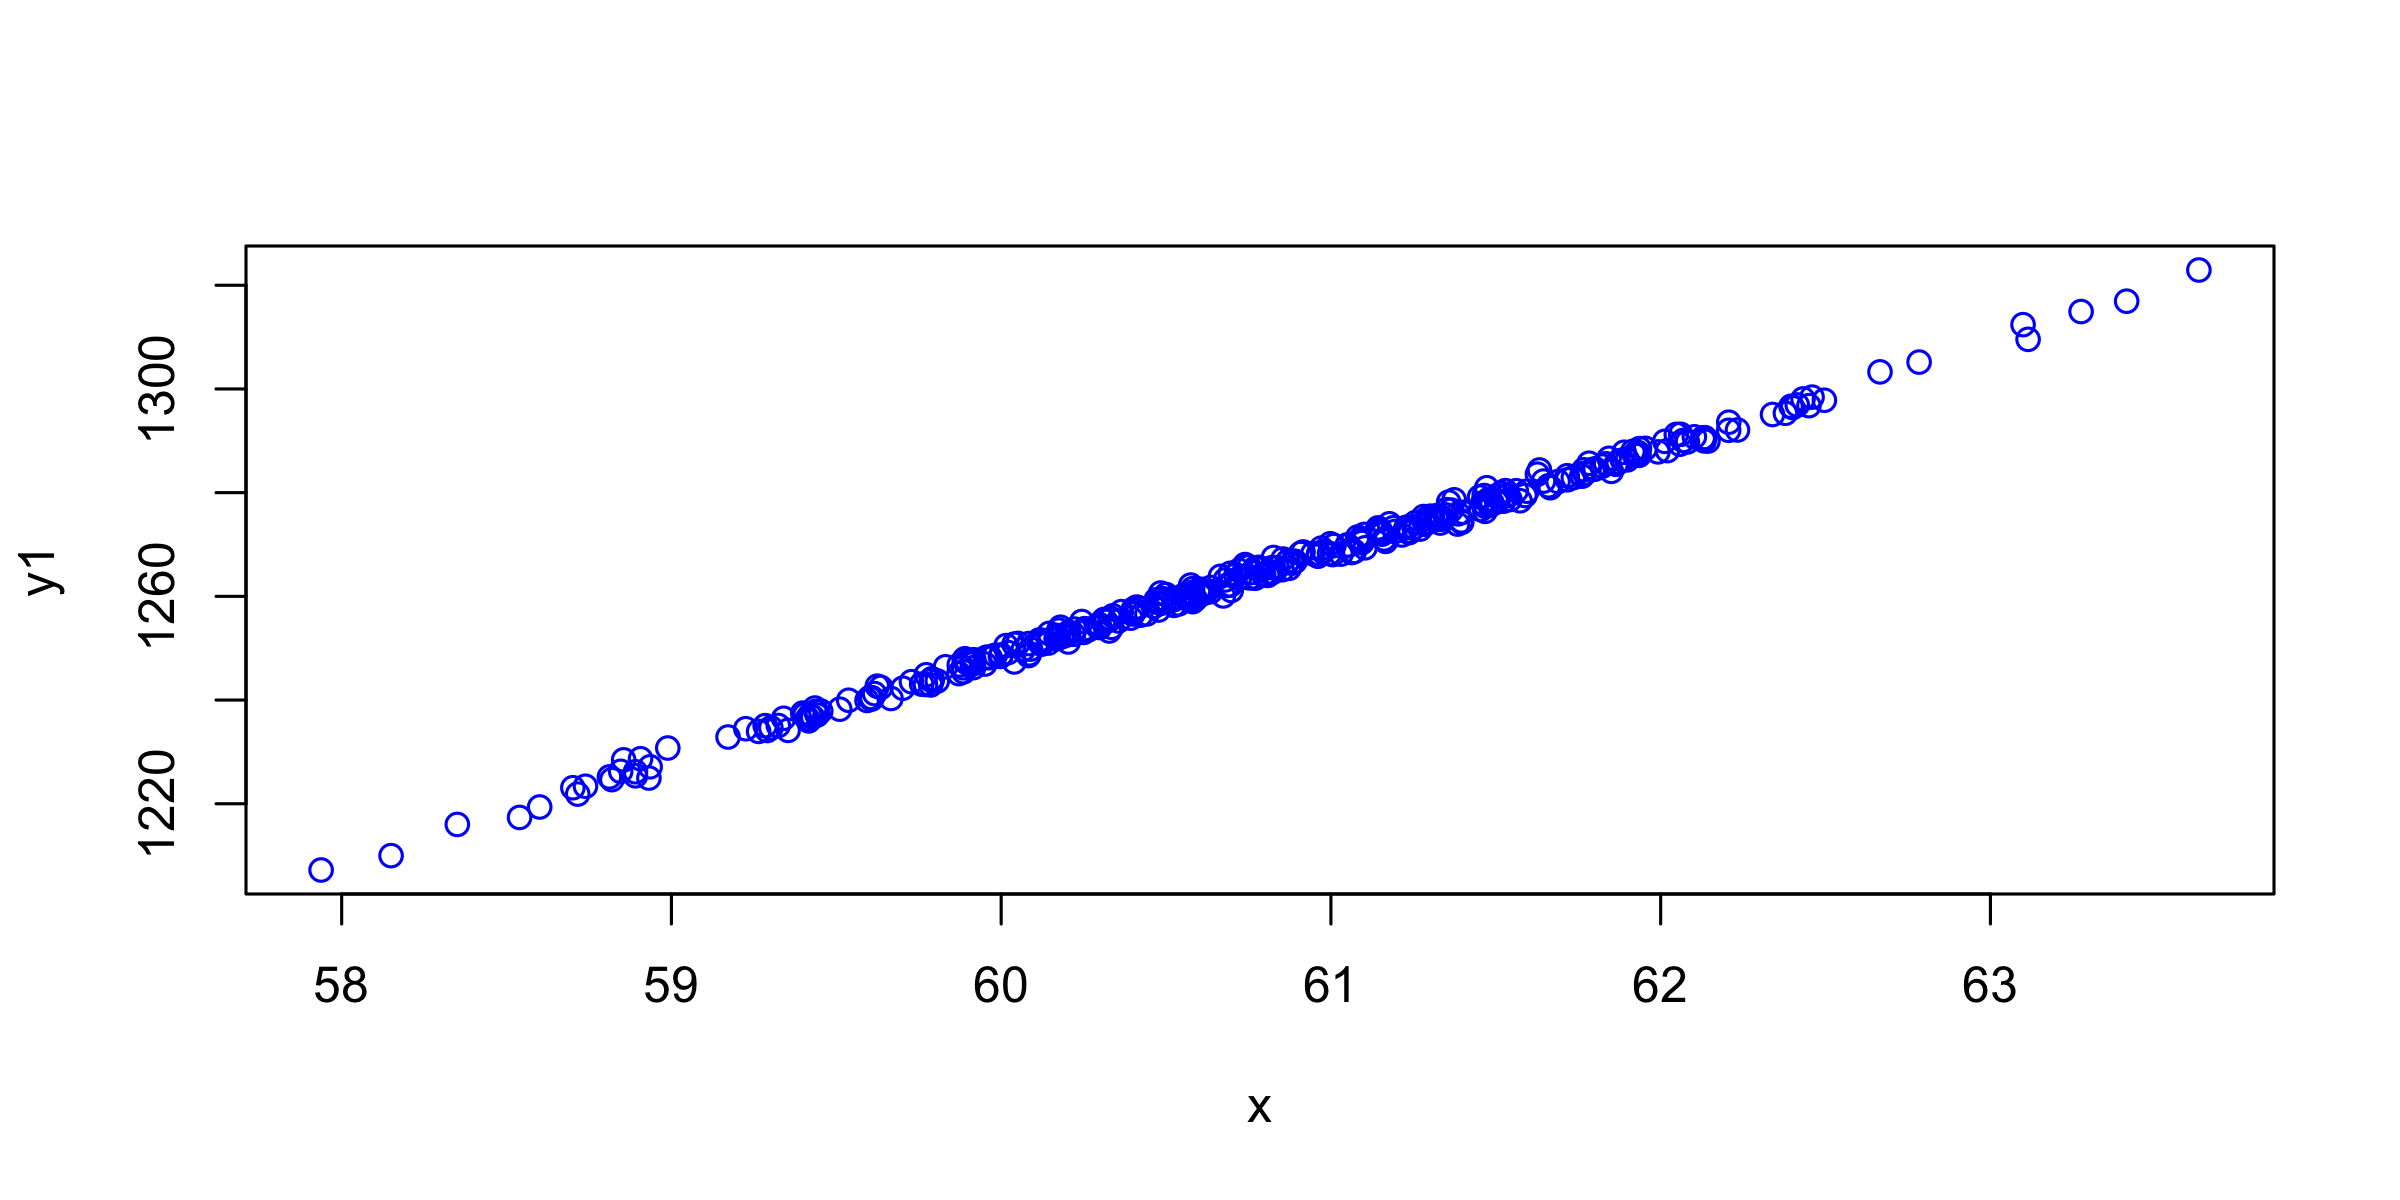

In [613]:
options(repr.plot.height=4,repr.plot.width=8, repr.plot.res = 300)

air_123 <- data.frame(na.omit(airbnb_entire[,c("Precio", "MetrosCuadrados", "NumDormitorios")]))


N_P <- length(air_123$Precio)
sd_P <- sd(air_123$Precio)

N_M <- length(air_123$MetrosCuadrados)
mean_M <- mean(air_123$MetrosCuadrados)
sd_M <- sd(air_123$MetrosCuadrados)

N_D <- length(air_123$NumDormitorios)
mean_D <- mean(air_123$NumDormitorios)
sd_D <- sd(air_123$NumDormitorios)

x <- rnorm(N_P,sd_P)
y1 <- 20*x+1+rnorm(N_P,sd_M)
y2 <- rnorm(N_P,mean_D, sd_D)
paste("La covarianza de las variables x, y1 es:",round(cov(x,y1),2))
paste("La variable y1, que representa los Metros Cuadrados, sí muestra relación con el Precio")
paste("La covarianza de las variables x, y2 es:",round(cov(x,y2),2))
paste("La variable y2, que representa el Num. de Dormitorios, no muestra relación con el Precio")
plot(x,y1,col="blue")
points(x,y2,col="red")

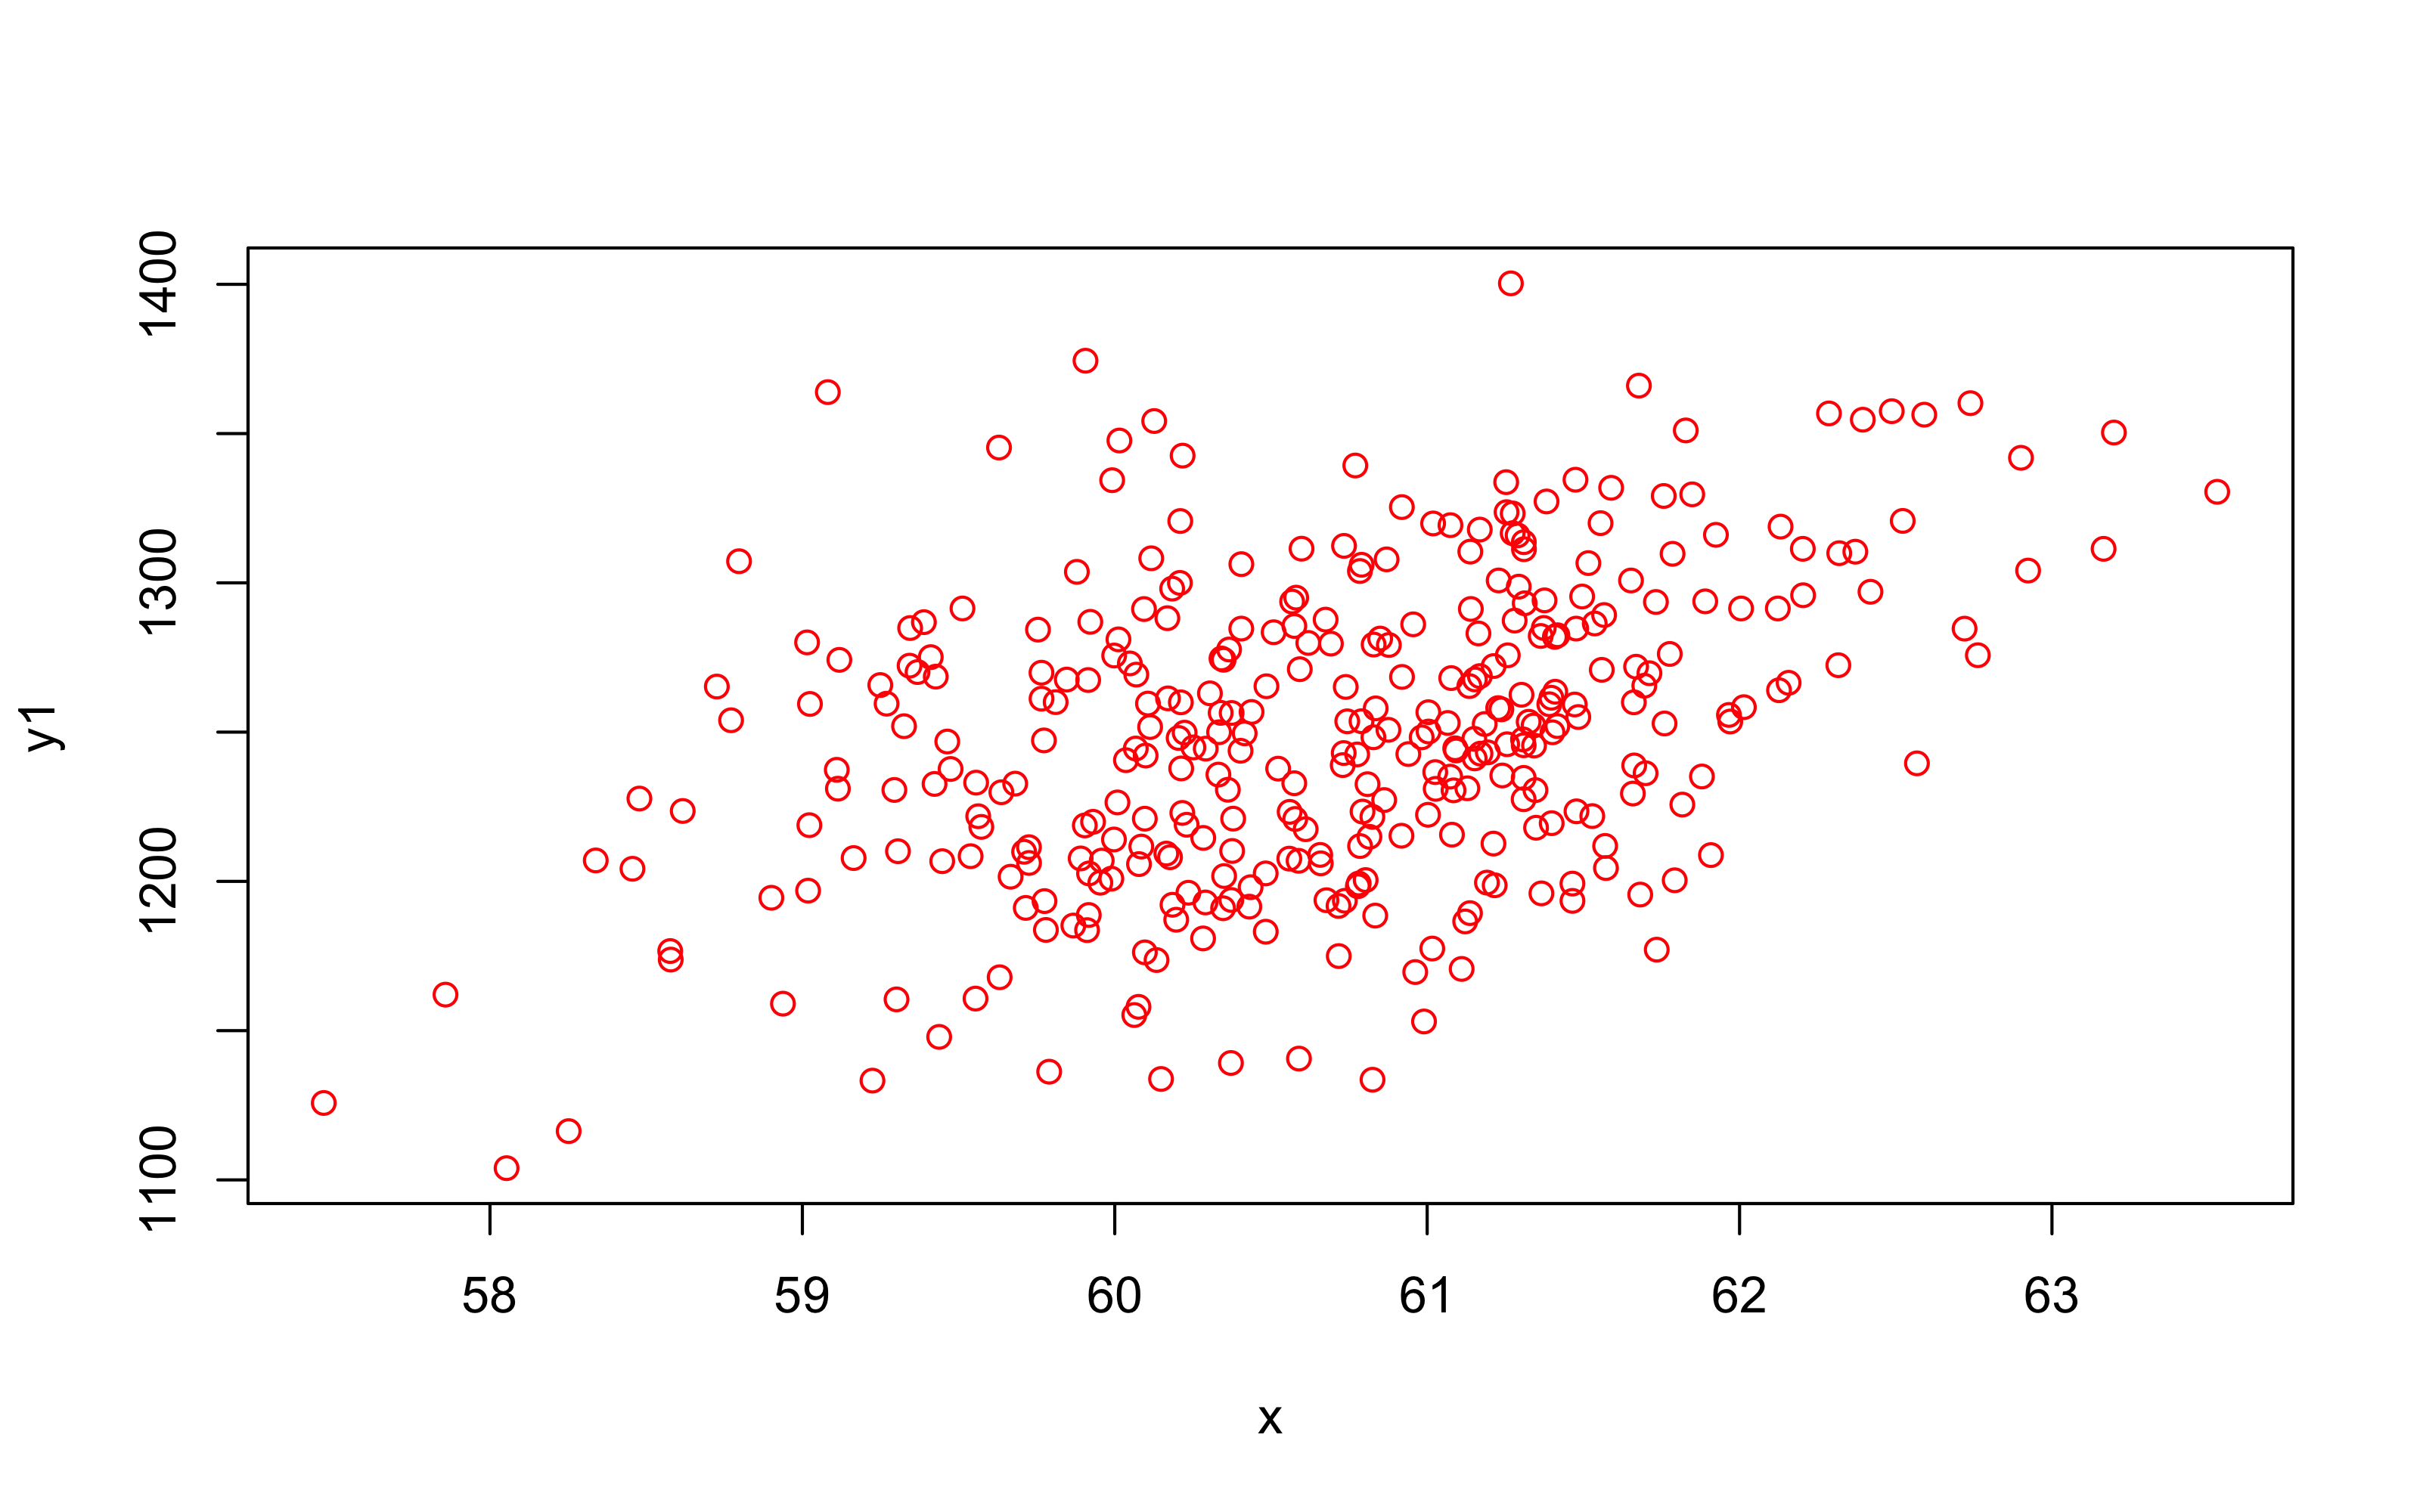

integer(0)

[1] "La covarianza de las variables x, y1 es: 21.27"

[1] "La covarianza de las variables x, y2 es: -0.04"

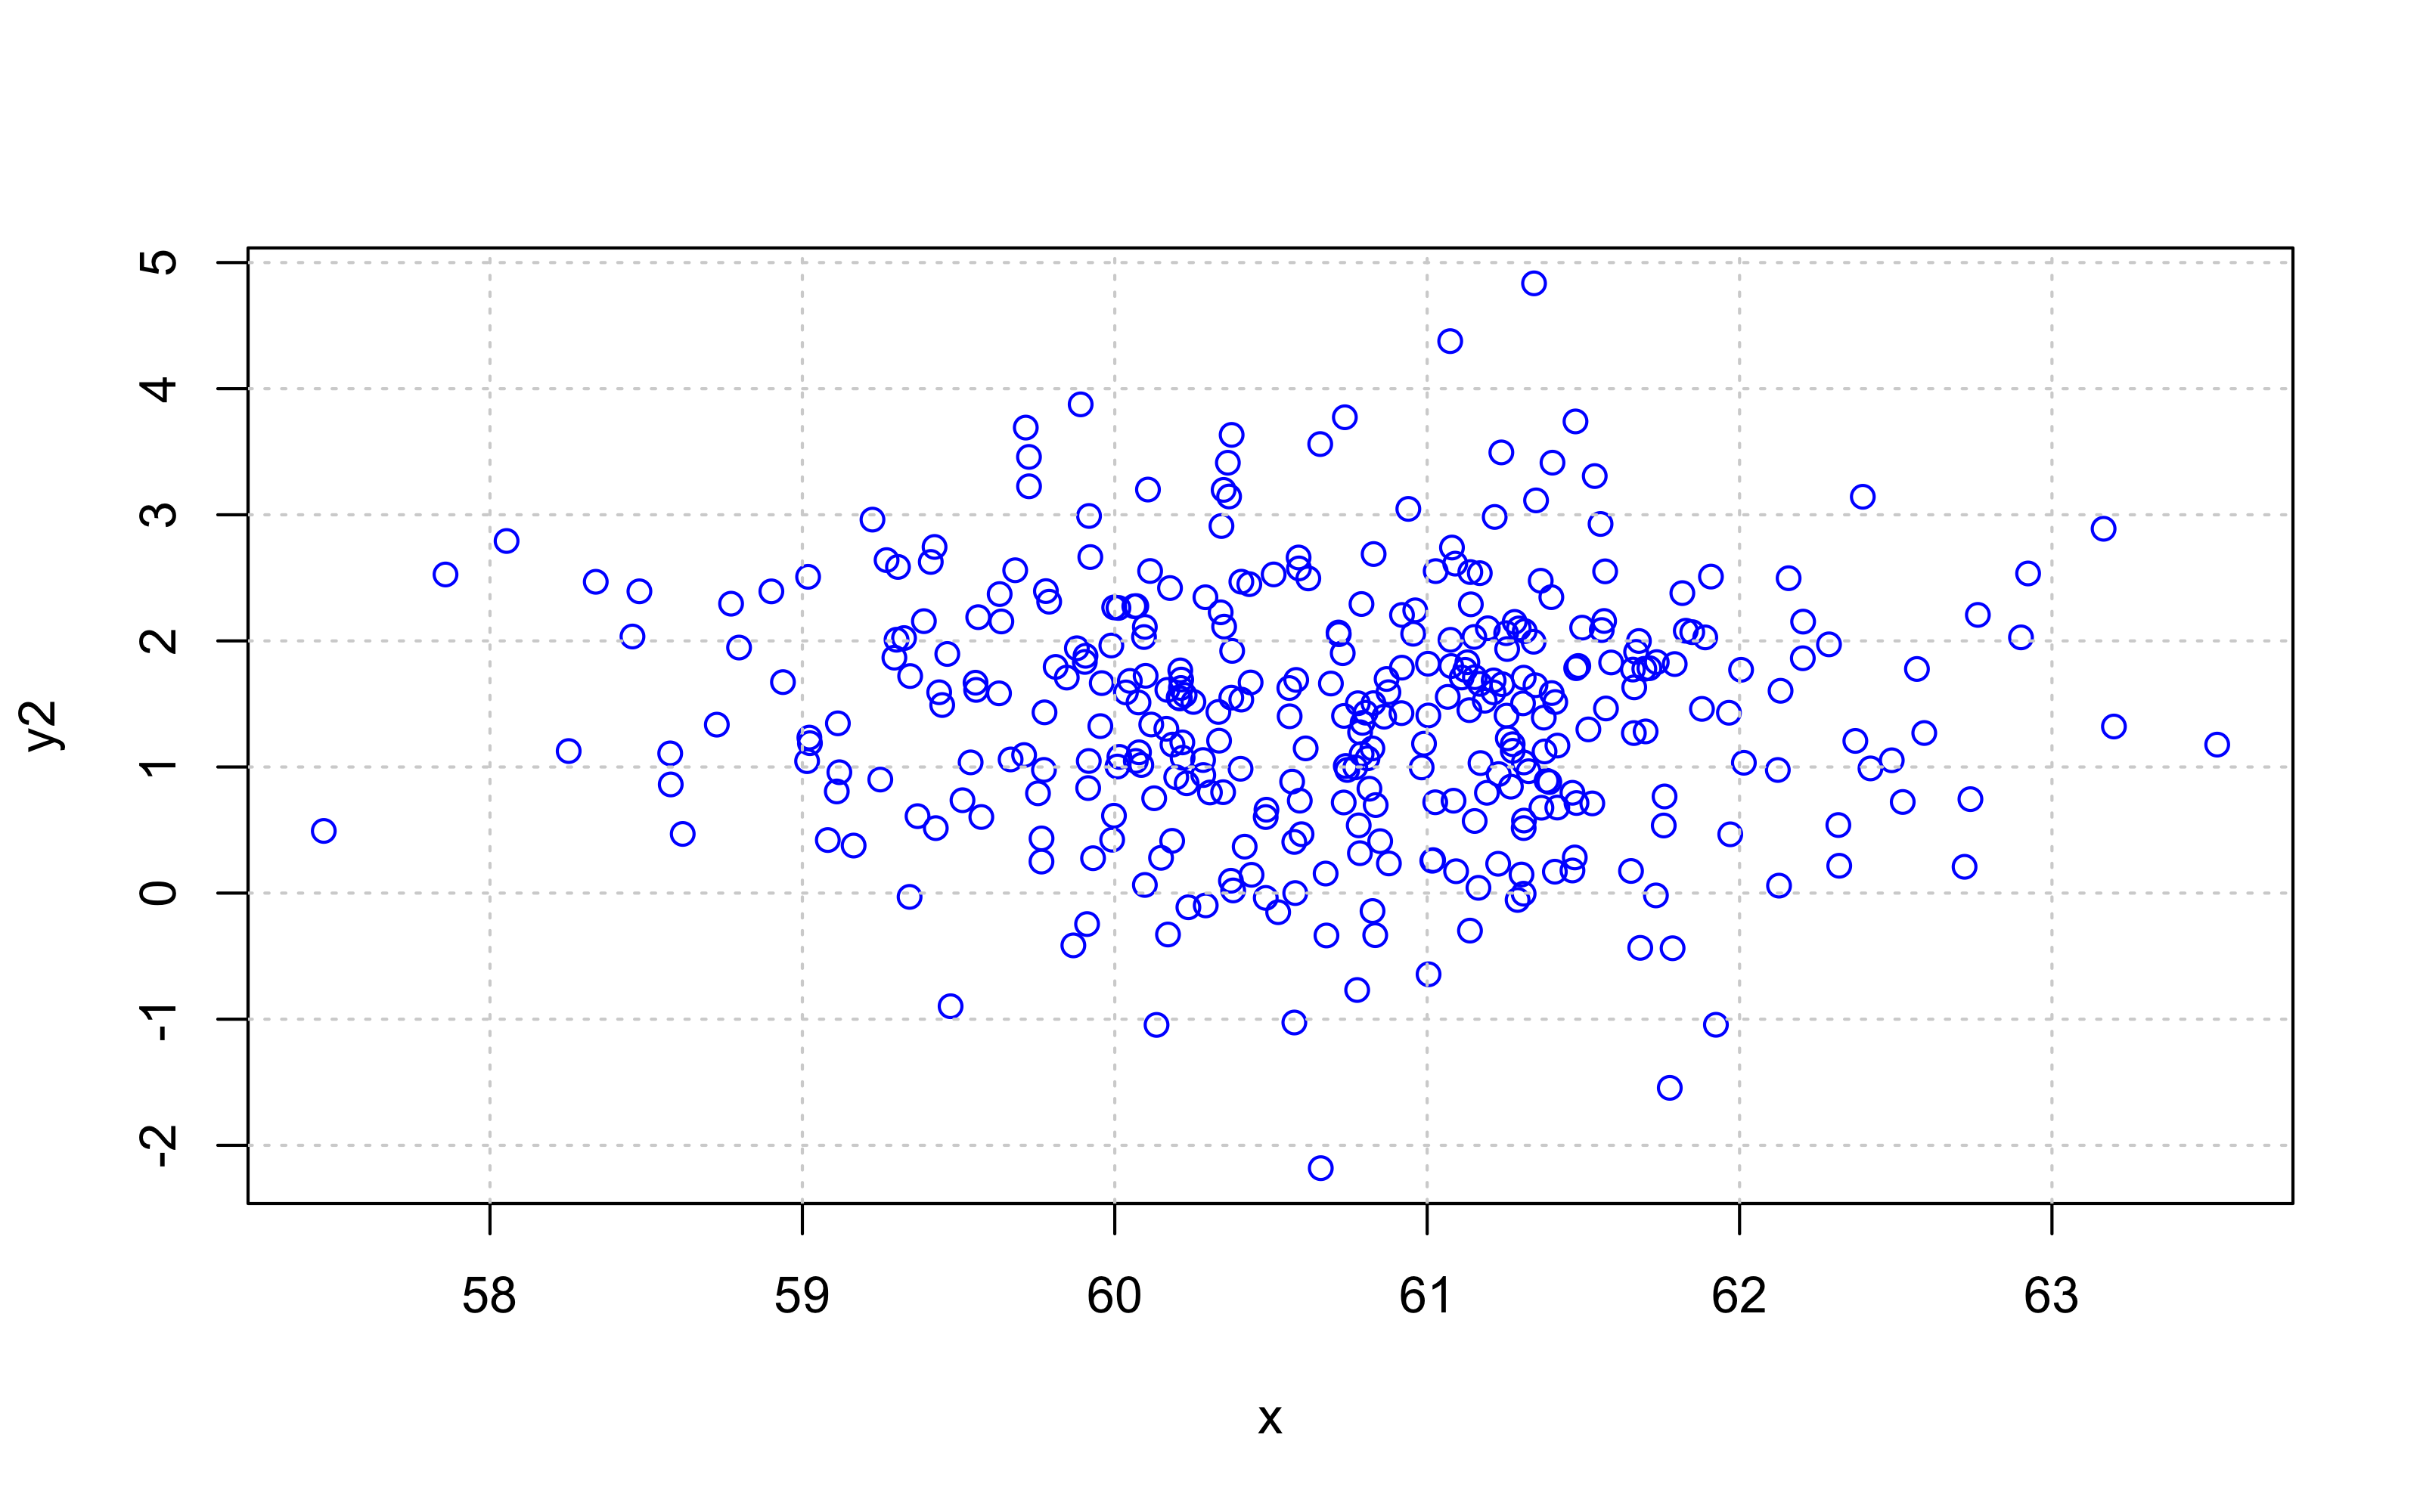

In [757]:
options(repr.plot.height=5,repr.plot.width=8 , repr.plot.res = 400)


x<-rnorm(N_P,sd_P)
y1<- 1+20*x+rnorm(N_P,mean_M,sd_M)
y2<- rnorm(N_P,mean_D,sd_D)

plot(x,y1,col="red")+
plot(x,y2,col="blue")+
abline(c(1,20),col="green")
grid()
paste("La covarianza de las variables x, y1 es:",round(cov(x,y1),2))
paste("La covarianza de las variables x, y2 es:",round(cov(x,y2),2))


In [759]:
cor(air_123[,c("Precio", "MetrosCuadrados", "NumDormitorios")])
paste("El numero de habitaciones es más fiable para determinar el precio de la vivienda")

Precio    MetrosCuadrados NumDormitorios
Precio          1.0000000 0.4252345       0.5212125     
MetrosCuadrados 0.4252345 1.0000000       0.4677679     
NumDormitorios  0.5212125 0.4677679       1.0000000

[1] "El numero de habitaciones es más fiable para determinar el precio de la vivienda"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [867]:
sd_M2 <- sd(air_123$MetrosCuadrados)
matrix_M2 <- data.matrix(air_123, rownames.force = NA)
m2 <- air_123$MetrosCuadrados

In [870]:

#metros cuadrados y habitaciones / hacer dos modelos 
library(magrittr)

n_M2<-length(air_123)
sd_M2 <- sd(air_123$MetrosCuadrados)

matrix_M2 <- data.matrix(air_123, rownames.force = NA)

#beta<-matrix_M2
e<-rnorm(n_M2,n_M2)
X<-matrix_M2
Y<-m2

datos <- data.frame(Y=Y,X=X[,3])
head(datos)
tail(datos)

model <- lm(data=datos, formula= Y ~ X)
summary(model)


Y     X
5  49.98 1
9  65.03 1
11  3.72 1
15 60.02 1
25 69.96 1
46 24.99 1

Y      X
12925  40.04 1
12929   0.00 2
12996   0.00 1
13030  60.02 2
13038 110.00 2
13187  27.03 1


Call:
lm(formula = Y ~ X, data = datos)

Residuals:
   Min     1Q Median     3Q    Max 
-94.58 -25.03  -1.84  27.88 362.26 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.843      4.196   0.439    0.661    
X             23.184      2.335   9.929   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.31 on 352 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2166 
F-statistic: 98.59 on 1 and 352 DF,  p-value: < 2.2e-16


In [871]:
model$coefficients

(Intercept)           X 
   1.843464   23.184383

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [746]:
##### air_new <- na.omit(airbnb_entire)
air_newD <- factor(air_new$NumDormitorios)
air_newD2 <- data.frame(table(air_newD))
newcolnames<-c("NumDorm", "FreQDorm")
names(air_newD2)[1:2]<-newcolnames[1:2]
air_newD2

NumDorm FreQDorm
1 0        28     
2 1       175     
3 2        90     
4 3        29     
5 4        12     
6 5         3

In [753]:
options(repr.plot.height=5,repr.plot.width=8 , repr.plot.res = 400)

df <- data.frame(air_newD2)
N <- length(air_newD2$FreQDorm)
mean <- mean(air_newD2$FreQDorm)
sd <- sd(air_newD2$FreQDorm)

prob <- pnorm(3,mean,sd)
prob

[1] 0.2091492

In [752]:
Men <- rnorm(3,mean,sd)
mean(Men)

[1] 30.92863

[1] "El margen que nos interesa está en el rango: [ -1.26 , -1.26 ]"

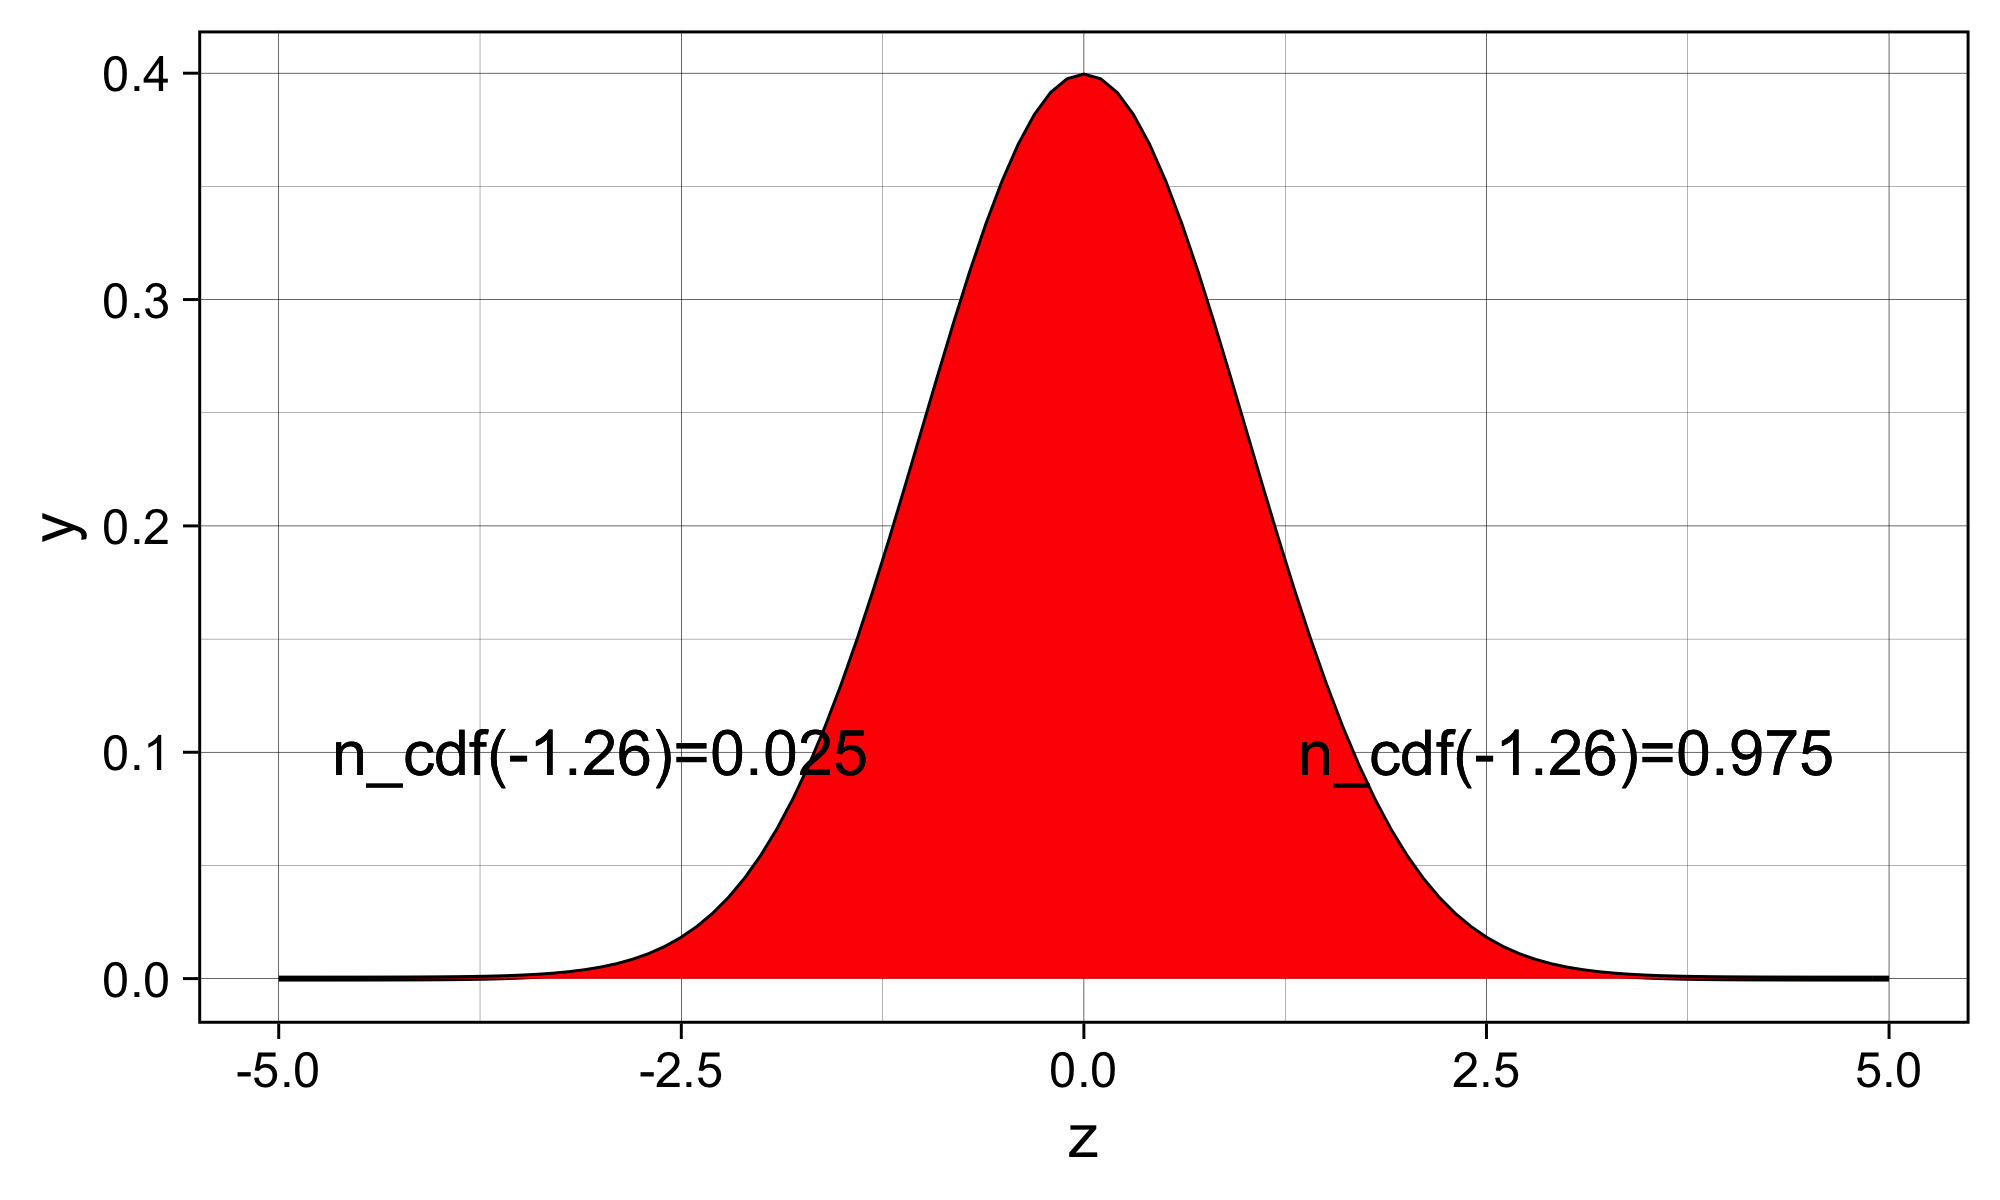

In [848]:
library(ggplot2)

loth<-qnorm(prob/2,lower.tail = T)
upth<-qnorm(prob/2,lower.tail = F)

paste("El margen que nos interesa está en el rango: [",
      round(loth,2),",",round(upth,2),"]")


qsd009<-function(x){    
    out<-dnorm(x)
    out[x> loth  & x<upth  ]<-NA
    out
}
options(repr.plot.height=3,repr.plot.width=5)
xdf<-data.frame(z=c(-5,5))
ggplot(xdf,aes(x=z))+stat_function(fun=dnorm)+
  stat_function(fun=qsd009, geom="area",fill="red")+
  geom_text(x=3,y=0.1,size=4,label=paste0("n_cdf(",round(upth,2),")=0.975"))+
  geom_text(x=-3,y=0.1,size=4,label=paste0("n_cdf(",round(loth,2),")=0.025"))+
  theme_linedraw()
options(repr.plot.height=7,repr.plot.width=7)